## Background and Context



AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.



## Objective

To predict whether a liability customer will buy a personal loan or not.
Which variables are most significant.
Which segment of customers should be targeted more.


## Data Description

The detailed data dictionary is given below. 

**Data Dictionary** 

* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

### Importing necessary libraries

In [5]:


# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# To build model for prediction

from sklearn.linear_model import LogisticRegression

# To get diferent metric scores
# To get diferent metric scores

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)



# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
)

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

In [6]:
# loading the dataset
data = pd.read_csv("Loan_Modelling.csv")

In [7]:
# checking shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 5000 rows and 14 columns.


In [8]:
# let's view a sample of the data
data.sample(n=10, random_state=1)

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
2764  2765   31           5      84    91320       1    2.9          3   
4767  4768   35           9      45    90639       3    0.9          1   
3814  3815   34           9      35    94304       3    1.3          1   
3499  3500   49          23     114    94550       1    0.3          1   
2735  2736   36          12      70    92131       3    2.6          2   
3922  3923   31           4      20    95616       4    1.5          2   
2701  2702   50          26      55    94305       1    1.6          2   
1179  1180   36          11      98    90291       3    1.2          3   
932    933   51          27     112    94720       3    1.8          2   
792    793   41          16      98    93117       1    4.0          3   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
2764       105              0                   0           0       0   
4767       101              0                   1           0       0   
3814         0              0                   0           0       0   
3499       286              0                   0           0       1   
2735       165              0                   0           0       1   
3922         0              0                   0           0       1   
2701         0              0                   0           0       1   
1179         0              0                   1           0       0   
932          0              0                   1           1       1   
792          0              0                   0           0       0   

      CreditCard  
2764           1  
4767           0  
3814           0  
3499           0  
2735           0  
3922           0  
2701           0  
1179           1  
932            1  
792            1

**Observations**

- `ID` is just an index for the data entry and will add no value to our analysis. So, we will drop it.

In [9]:
# let's create a copy of the data to avoid any changes to original data
df = data.copy()

In [6]:
# drop the S.No. column as it does not add any value to the analysis
df.drop("S.No.", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [10]:
# checking column datatypes and number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**Observations**

- All columns are numerical-**int64** and **float64**

In [189]:
# checking for duplicate values
df.duplicated().sum()

0

- There is no duplicate value in the data.

In [188]:
data["Personal_Loan"].value_counts()

0    4520
1     480
Name: Personal_Loan, dtype: int64

- Let's take a closer look at it.

### Summary of the dataset.

In [13]:
df.describe().T

count          mean          std      min       25%  \
ID                  5000.0   2500.500000  1443.520003      1.0   1250.75   
Age                 5000.0     45.338400    11.463166     23.0     35.00   
Experience          5000.0     20.104600    11.467954     -3.0     10.00   
Income              5000.0     73.774200    46.033729      8.0     39.00   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.00   
Family              5000.0      2.396400     1.147663      1.0      1.00   
CCAvg               5000.0      1.937938     1.747659      0.0      0.70   
Education           5000.0      1.881000     0.839869      1.0      1.00   
Mortgage            5000.0     56.498800   101.713802      0.0      0.00   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.00   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.00   
CD_Account          5000.0      0.060400     0.238250      0.0      0.00   
Online              5000.0      0.596800     0.490589      0.0      0.00   
CreditCard          5000.0      0.294000     0.455637      0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIPCode             93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal_Loan           0.0      0.00      1.0  
Securities_Account      0.0      0.00      1.0  
CD_Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

* Professional no of year experience contain negative values.
* Family Contain minimum 1 and maximum 4 members.
* Income and CCAvg variables are seem to be right skewed.

### EDA

## Univariate analysis

In [17]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

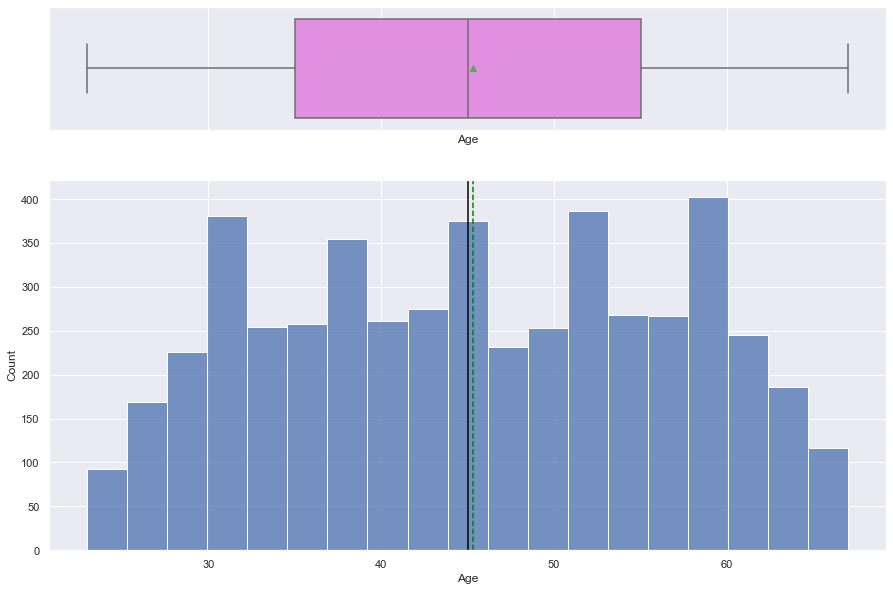

In [19]:
histogram_boxplot(data, "Age")

* Age is normally distributed.

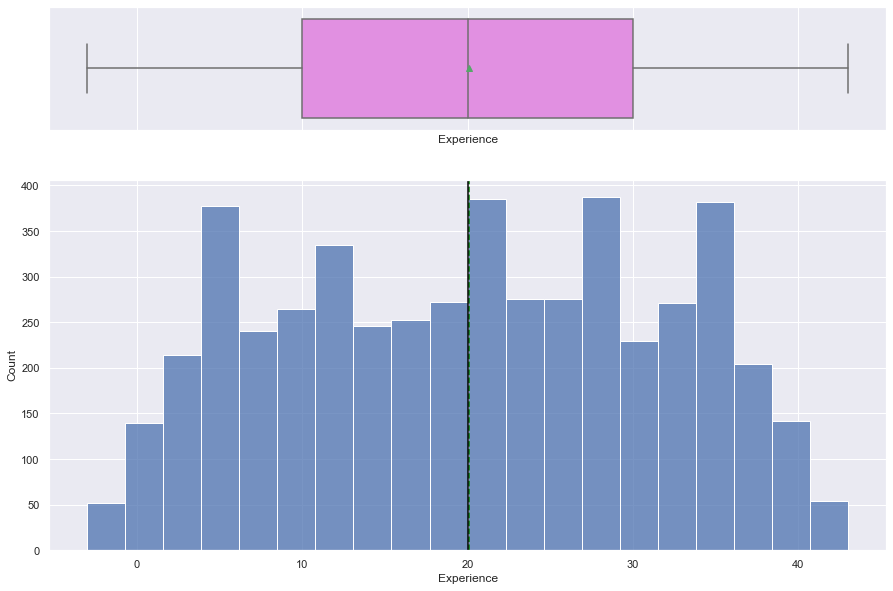

In [20]:
histogram_boxplot(data, "Experience")

* Experience is normally distributed.

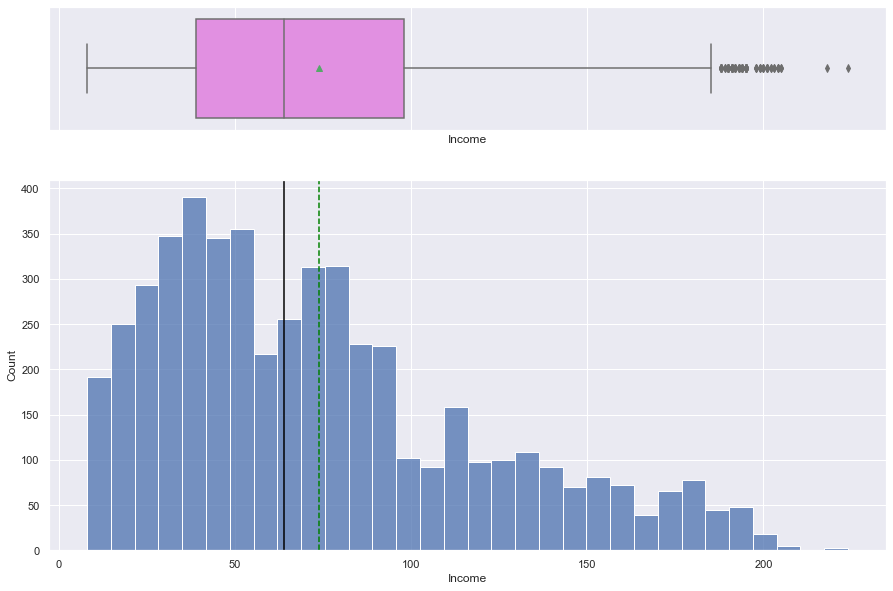

In [21]:
histogram_boxplot(data, "Income")

* Income is right skewed and contain outliers at the right end

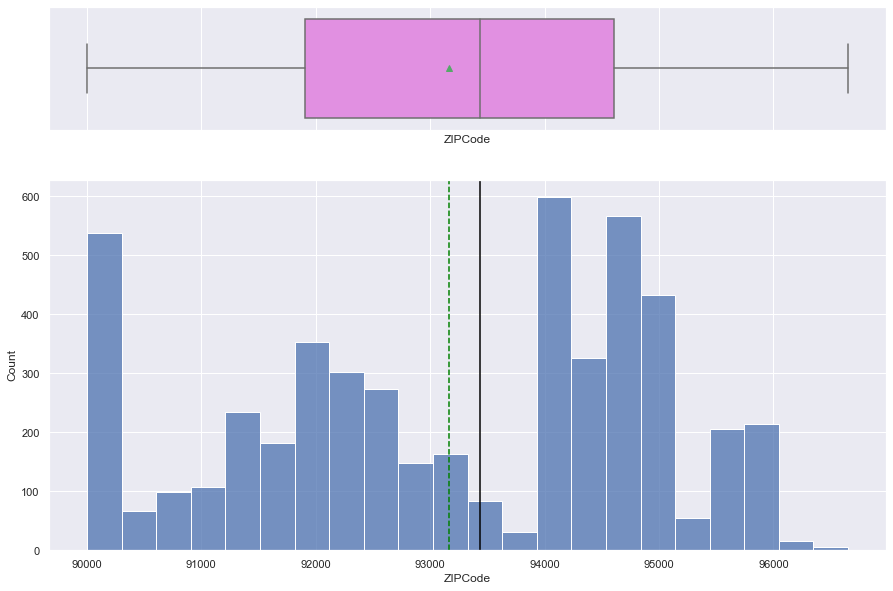

In [22]:
histogram_boxplot(data, "ZIPCode")

* Most customers are from zipcode 94720,94305 and 95616

In [193]:
data["ZIPCode"].value_counts()

94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
94087      1
96145      1
90068      1
92694      1
94404      1
Name: ZIPCode, Length: 467, dtype: int64

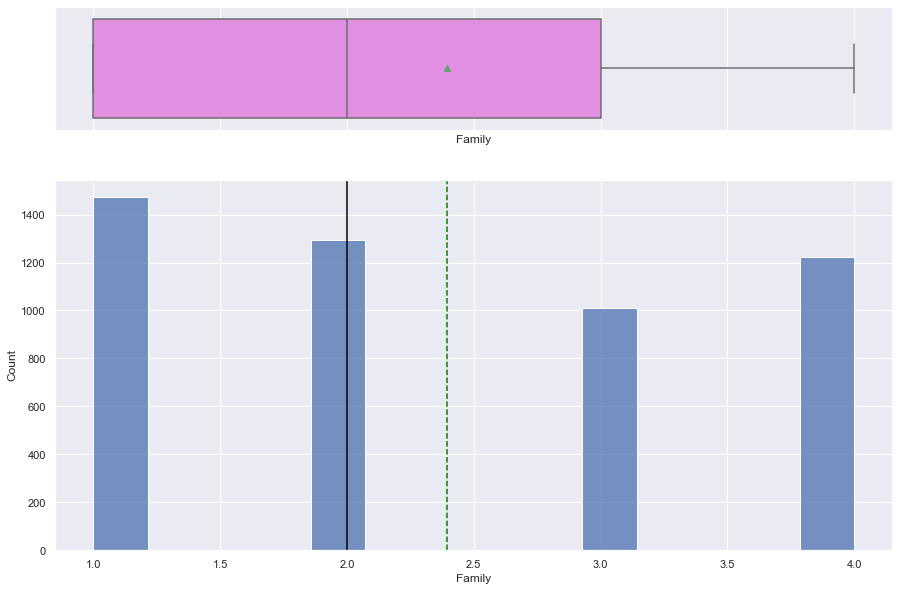

In [23]:
histogram_boxplot(data, "Family")

* Family size =1 customers are more compared to other family size.

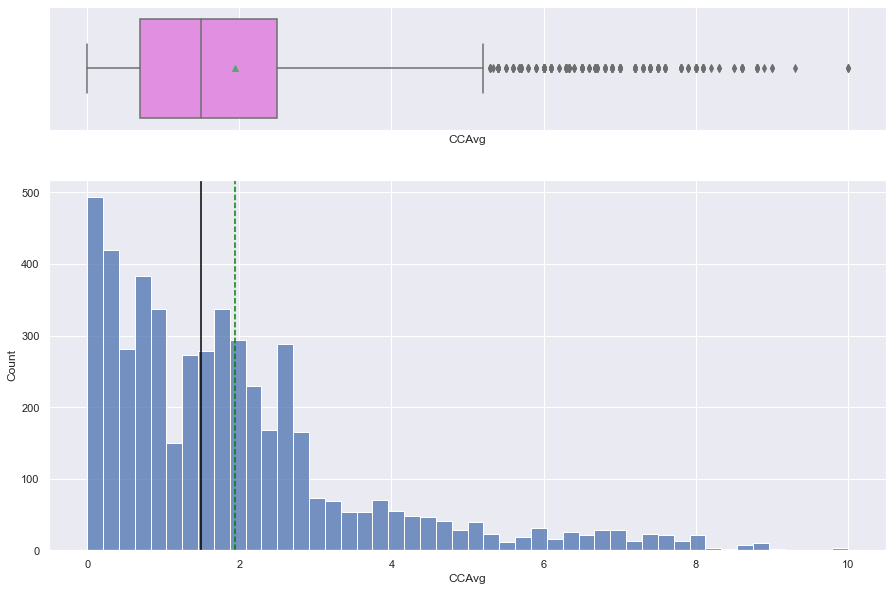

In [24]:
histogram_boxplot(data, "CCAvg")

* CCAvg is right skewed and contain many outliers at the right end

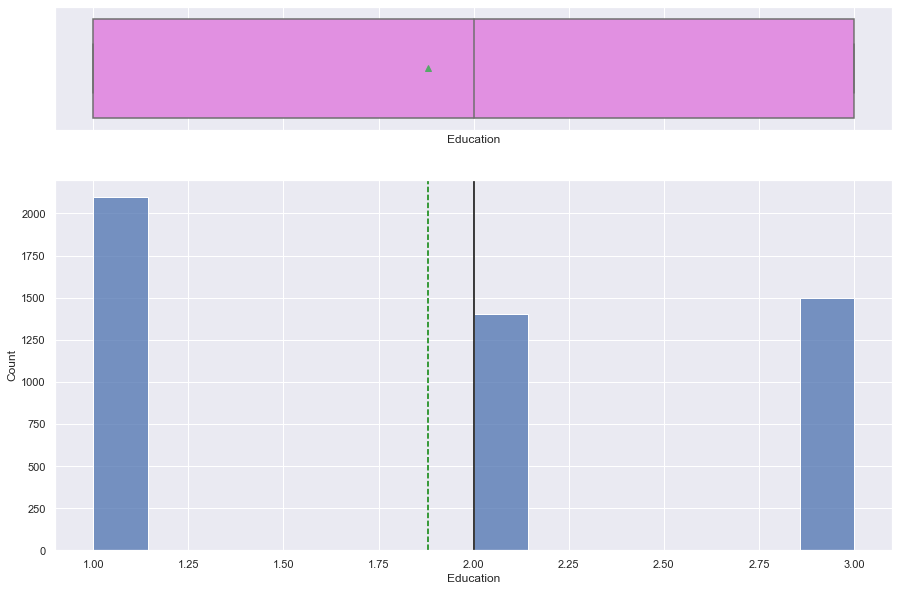

In [25]:
histogram_boxplot(data, "Education")

*Undergraduate customers are highest in number.

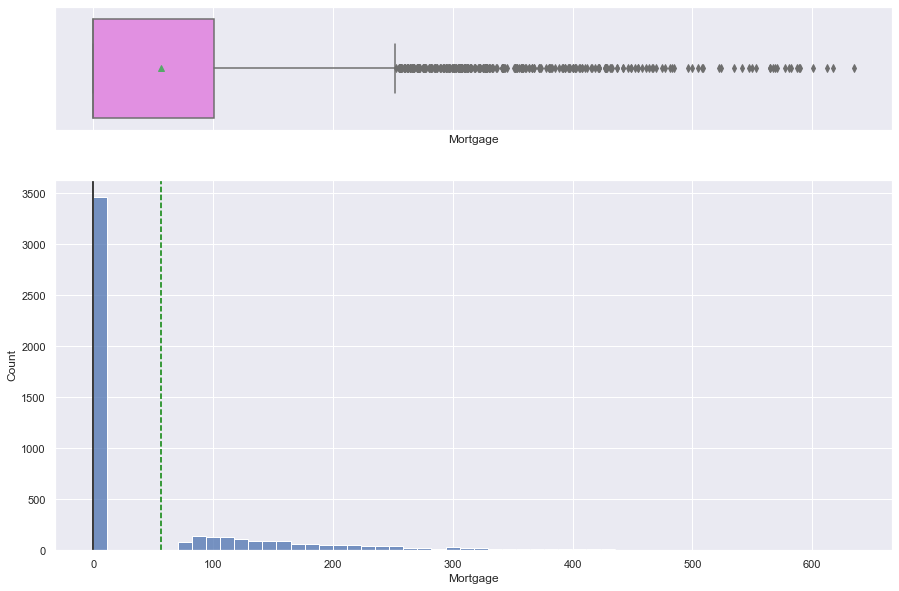

In [26]:
histogram_boxplot(data, "Mortgage")

In [194]:
data["Mortgage"].value_counts()

0      3462
98       17
89       16
91       16
83       16
       ... 
206       1
210       1
258       1
278       1
635       1
Name: Mortgage, Length: 347, dtype: int64

In [ ]:
Most of the customers dont have mortgage.

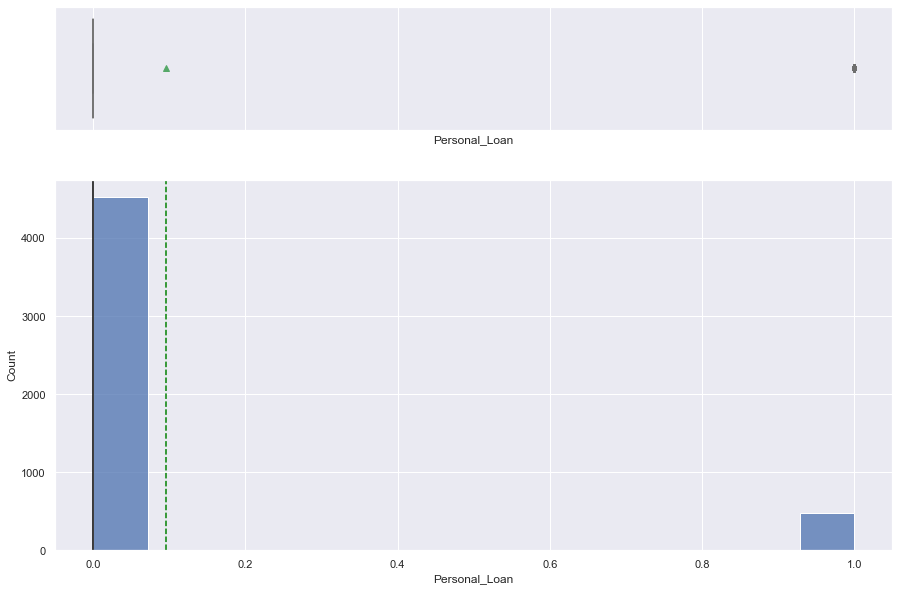

In [27]:
histogram_boxplot(data, "Personal_Loan")


* very few customers have personal loan

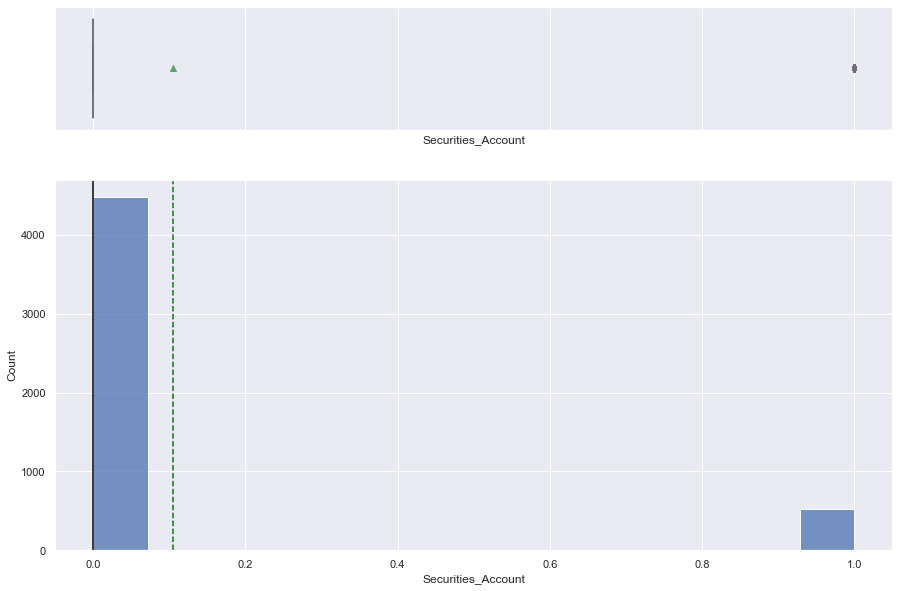

In [28]:
histogram_boxplot(data, "Securities_Account")


In [195]:
data["Securities_Account"].value_counts()

0    4478
1     522
Name: Securities_Account, dtype: int64

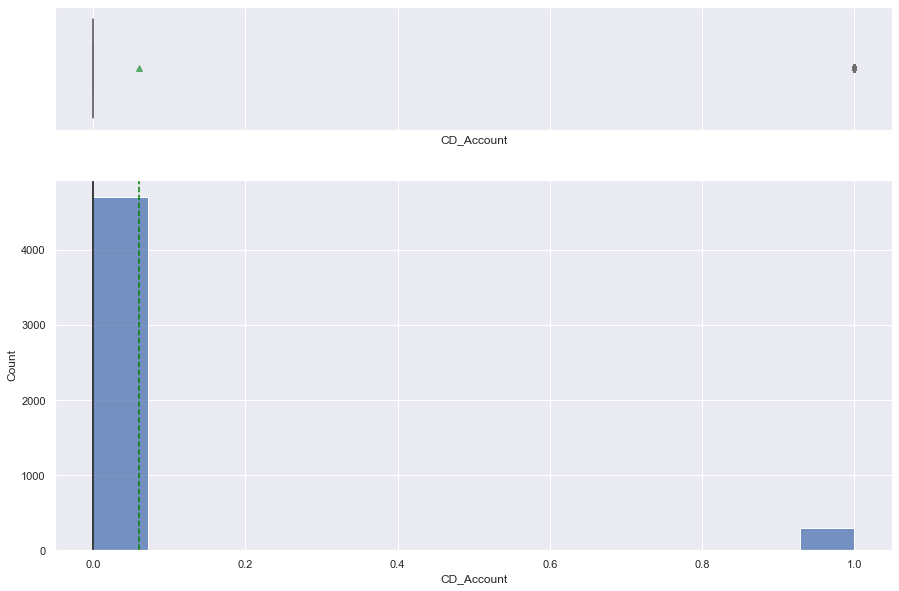

In [29]:
histogram_boxplot(data, "CD_Account")


* most of the customers dont have CD_Account with the bank

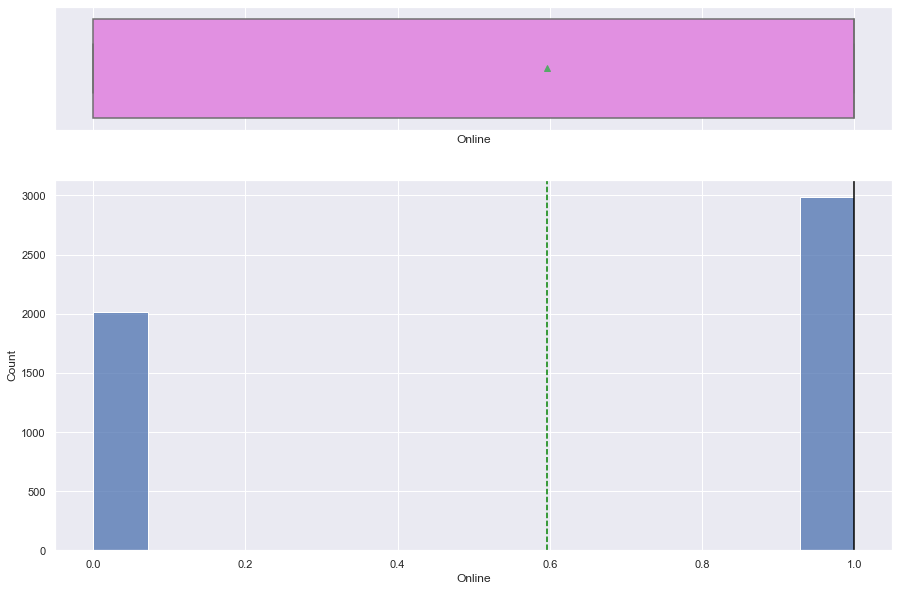

In [30]:
histogram_boxplot(data, "Online")


* Most customers use internet banking

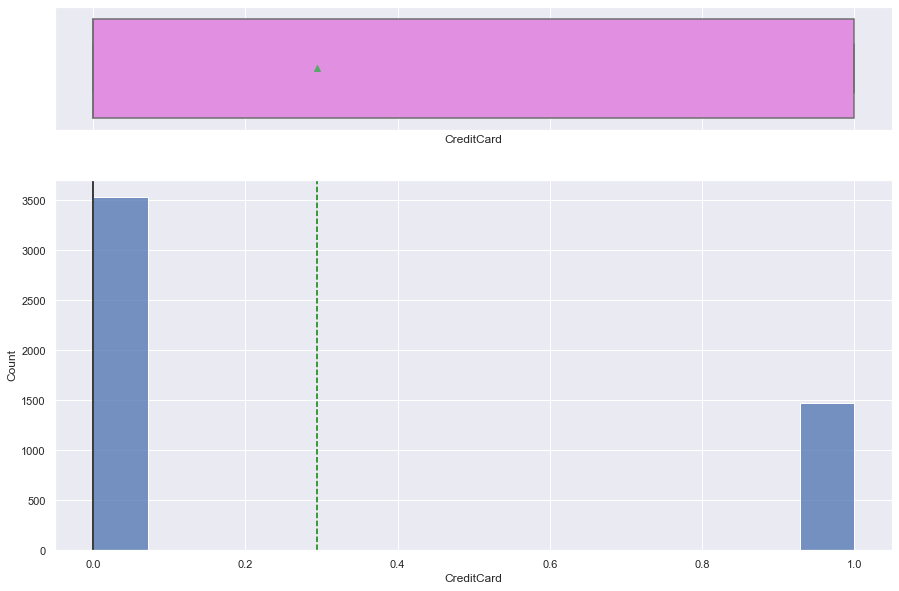

In [31]:
histogram_boxplot(data, "CreditCard")


* Mostcustomers not using credit cards

In [33]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

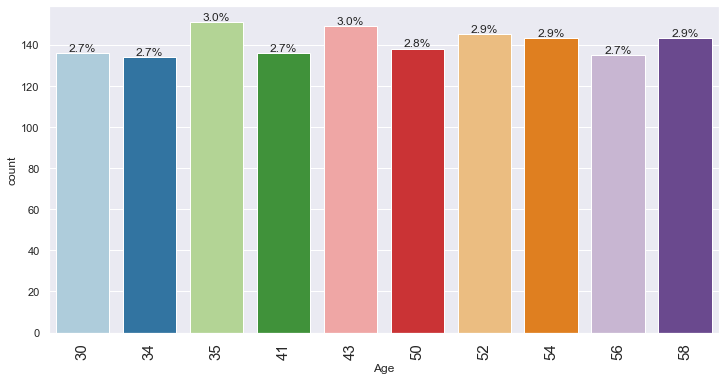

In [36]:
labeled_barplot(data, "Age", perc=True, n=10)

* 3 % customers are with age 35 and 3% with age 43.

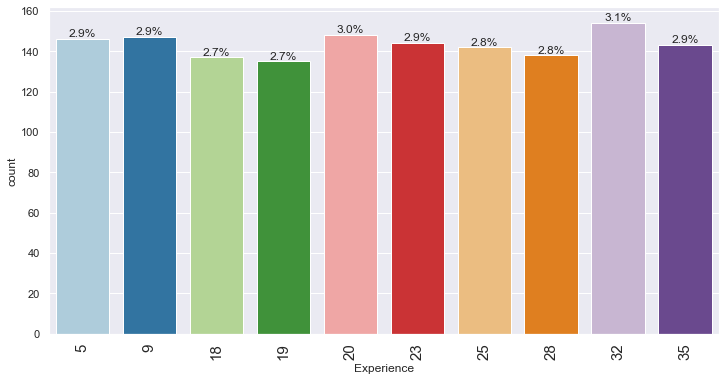

In [38]:

labeled_barplot(data, "Experience", perc=True, n=10)

* 3.1% customers have Professional experience of 32 years

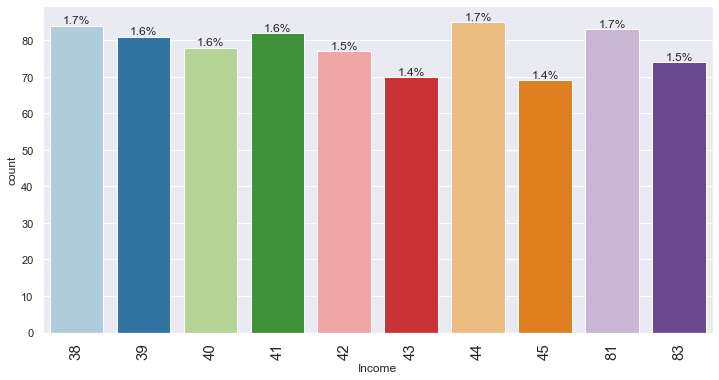

In [41]:
labeled_barplot(data, "Income", perc=True, n=10)

* 1.7 % Customers with annual income of 38000, 44000 , 81000 dollars

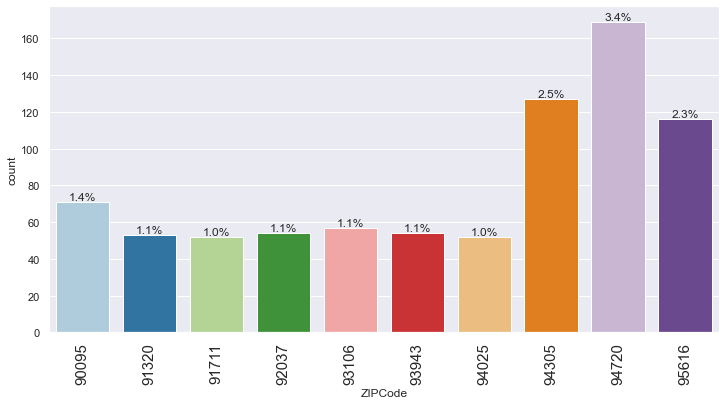

In [42]:
labeled_barplot(data, "ZIPCode", perc=True, n=10)

* 3.4% customers from zip code 94720

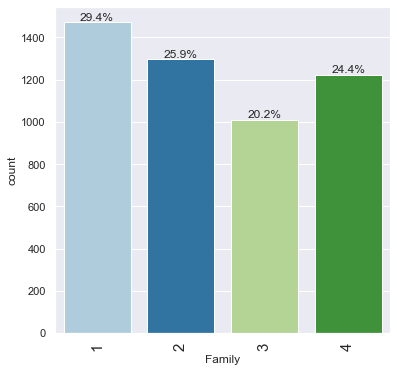

In [44]:
labeled_barplot(data, "Family", perc=True, n=4)

* 29.4% Customers are 1 member family

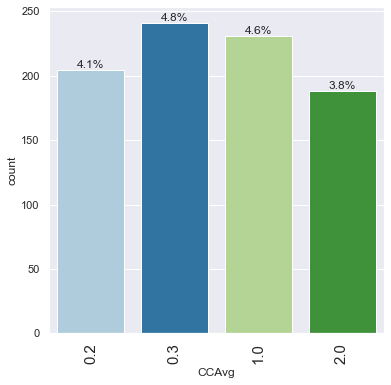

In [47]:
labeled_barplot(data, "CCAvg", perc=True, n=4)

* 4.8% Average spending on credit card  is 0.3

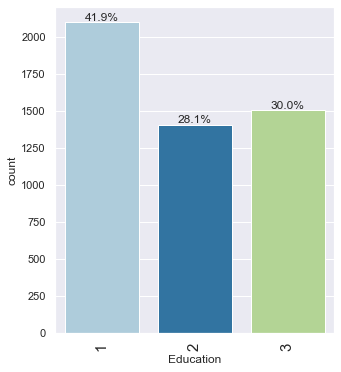

In [48]:
labeled_barplot(data, "Education", perc=True, n=3)

* 41.9% customers are undergraduate

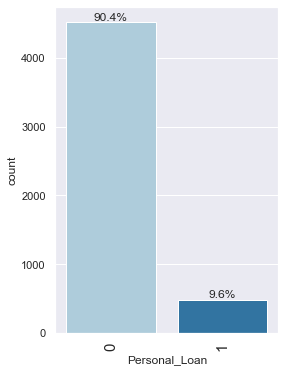

In [55]:
labeled_barplot(data, "Personal_Loan", perc=True, n=2)

* 9.6% customers have personal loan

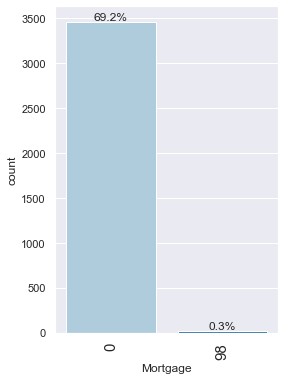

In [57]:
labeled_barplot(data, "Mortgage", perc=True, n=2)

* 69.2% customers not have mortgage

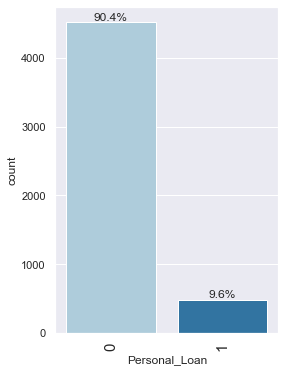

In [58]:
labeled_barplot(data, "Personal_Loan", perc=True, n=2)

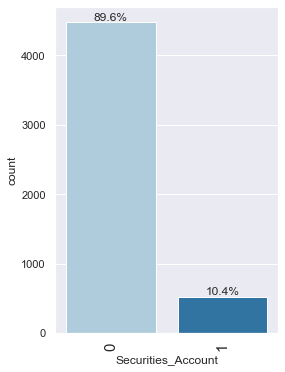

In [59]:
labeled_barplot(data, "Securities_Account", perc=True, n=2)

* 10.4% customers have securities account

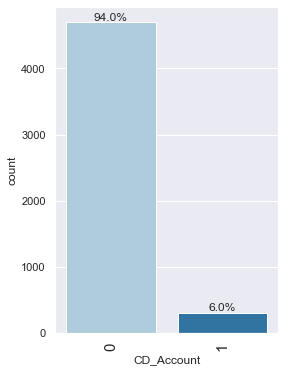

In [60]:
labeled_barplot(data, "CD_Account", perc=True, n=2)

* 6% customers have CD_Account

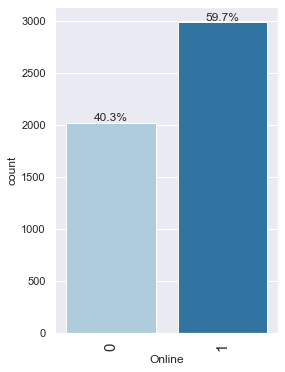

In [61]:
labeled_barplot(data, "Online", perc=True, n=2)

In [ ]:
* 59.7 customers have Online account

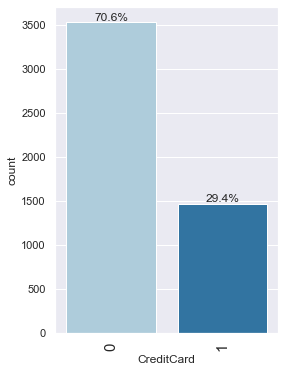

In [62]:
labeled_barplot(data, "CreditCard", perc=True, n=2)

* 29.4 customers have credit card

## Bivariate Analysis


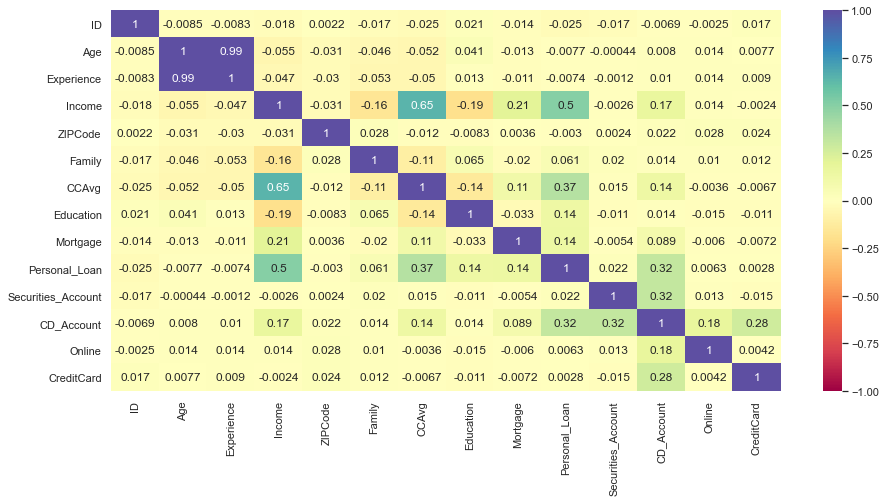

In [73]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral")
plt.show()

* Experience and Age are highly correlated
* Income and CCAvg are highly correlated
* Personal loan and income highly correlated

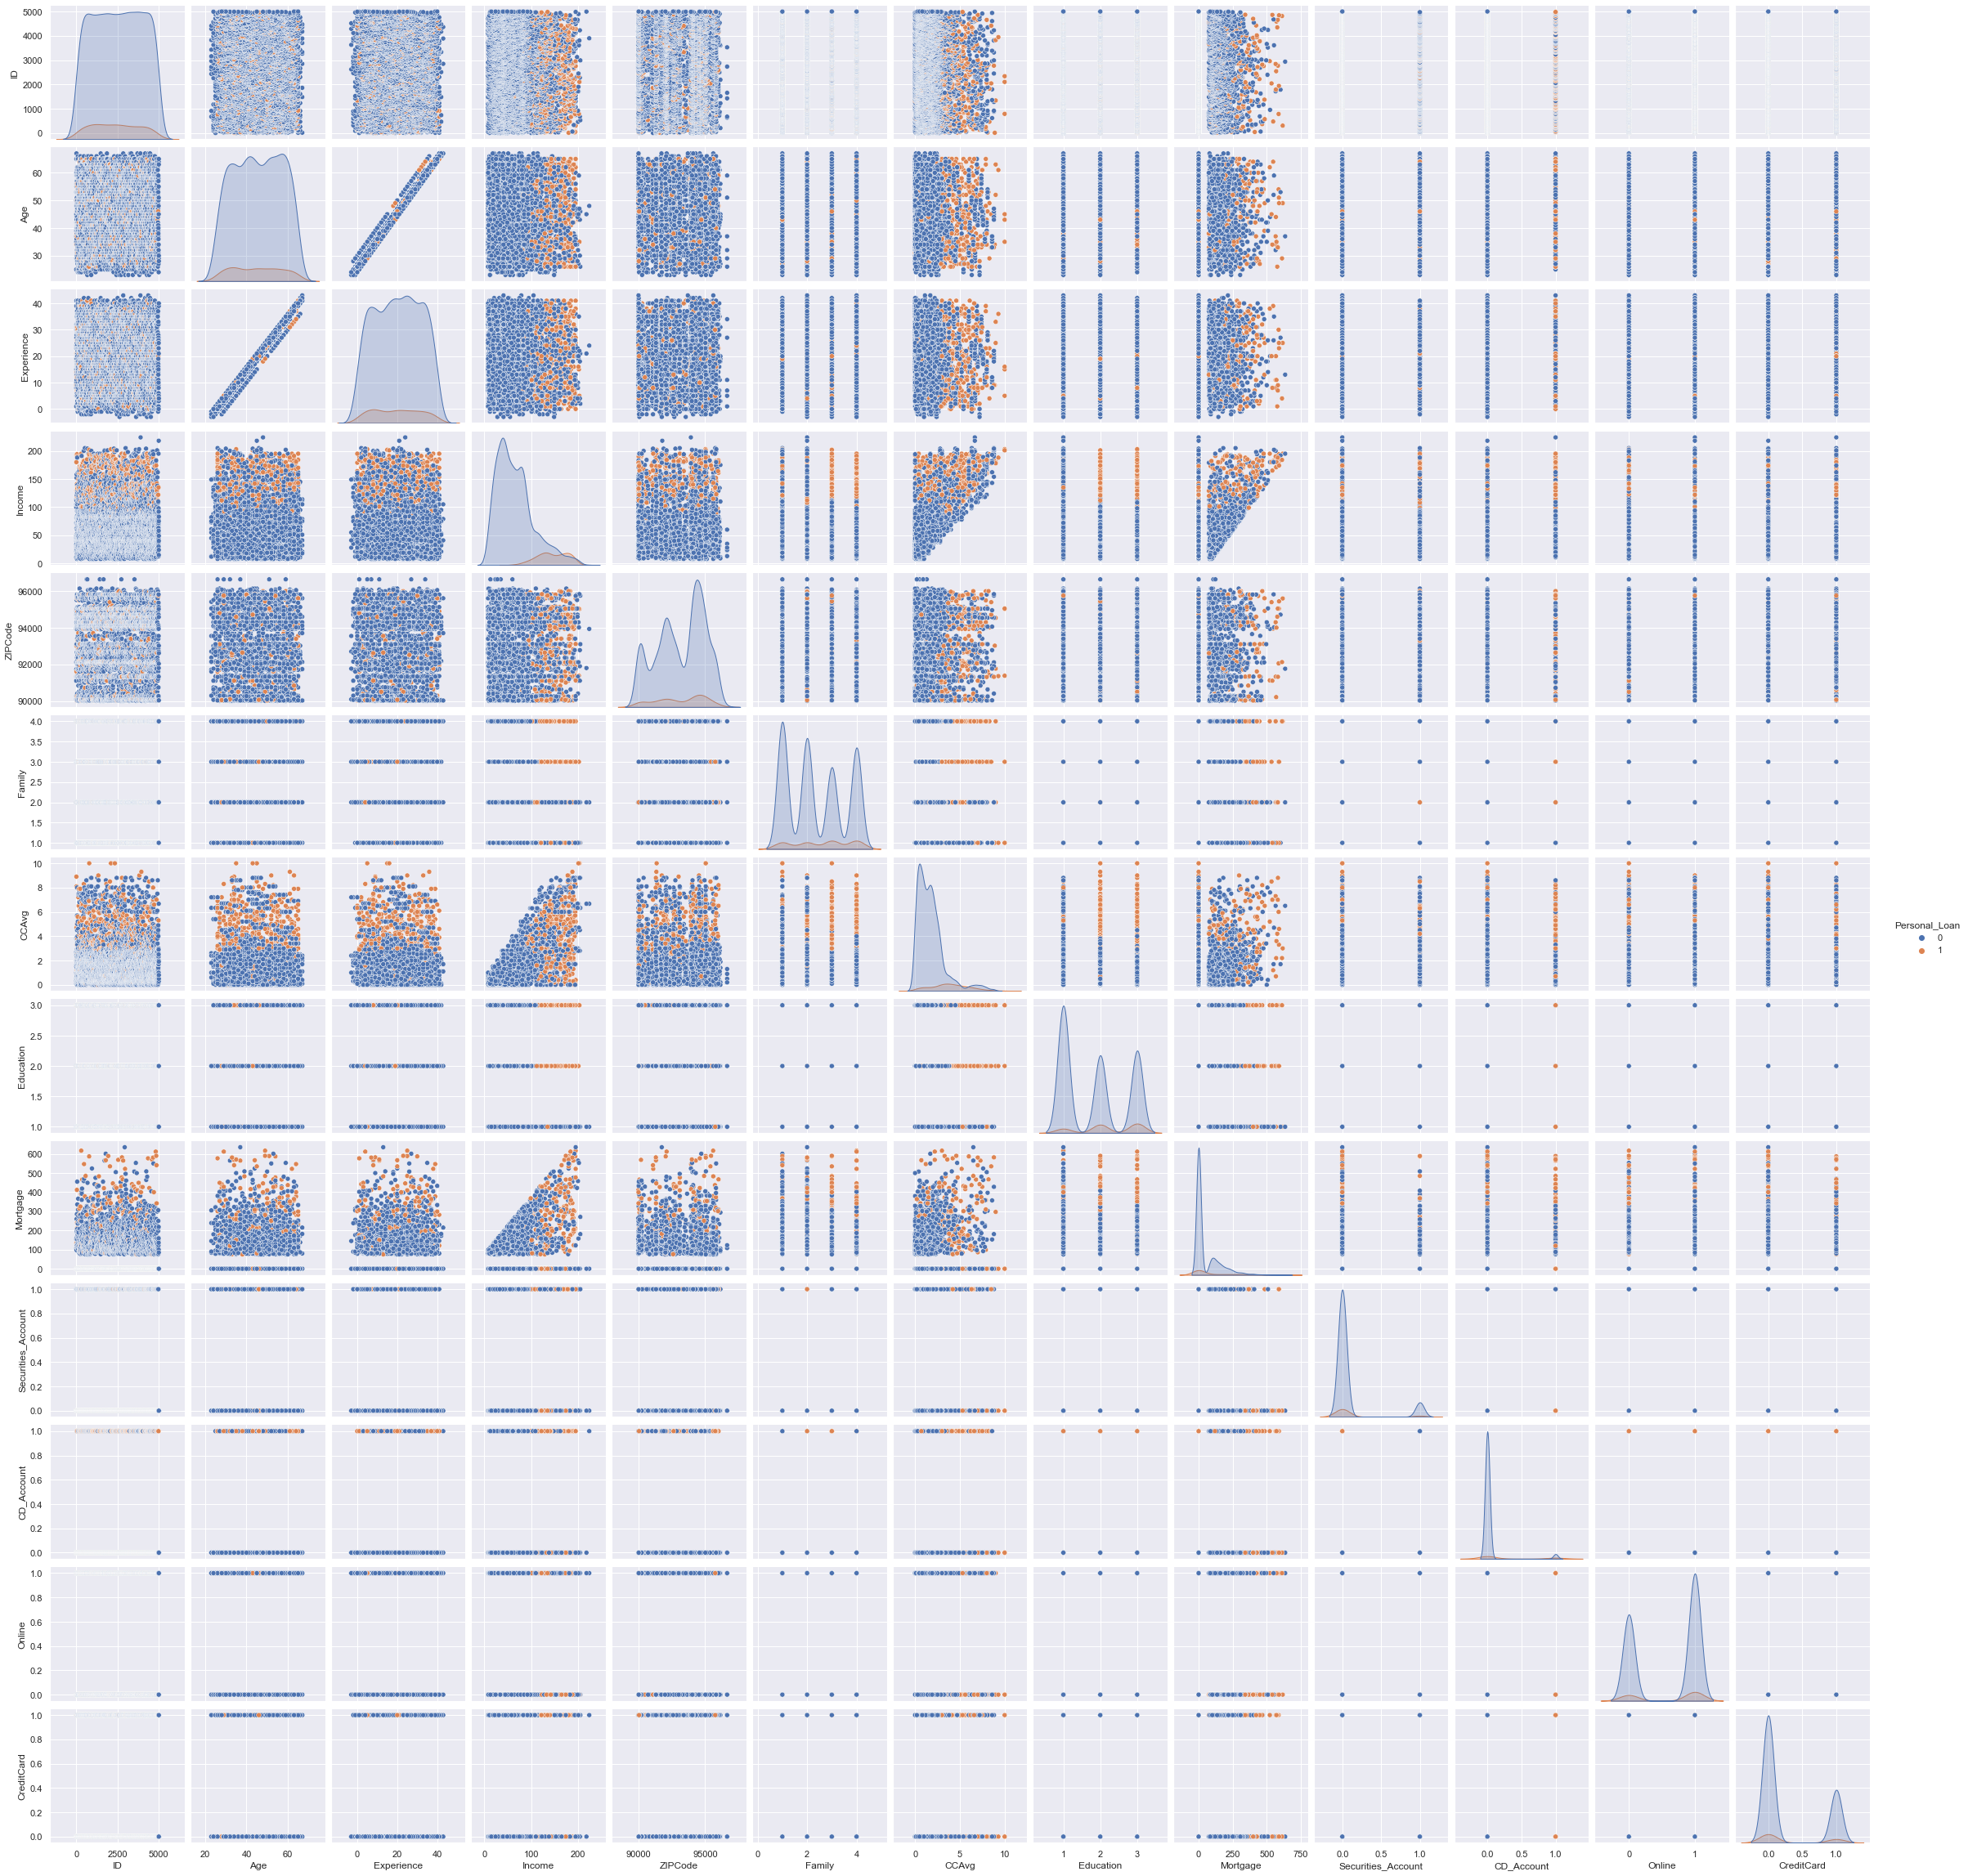

In [77]:
sns.pairplot(data=data,hue="Personal_Loan")
plt.show()

* We can see varying distributions in variables for revenue, we should investigate it further.

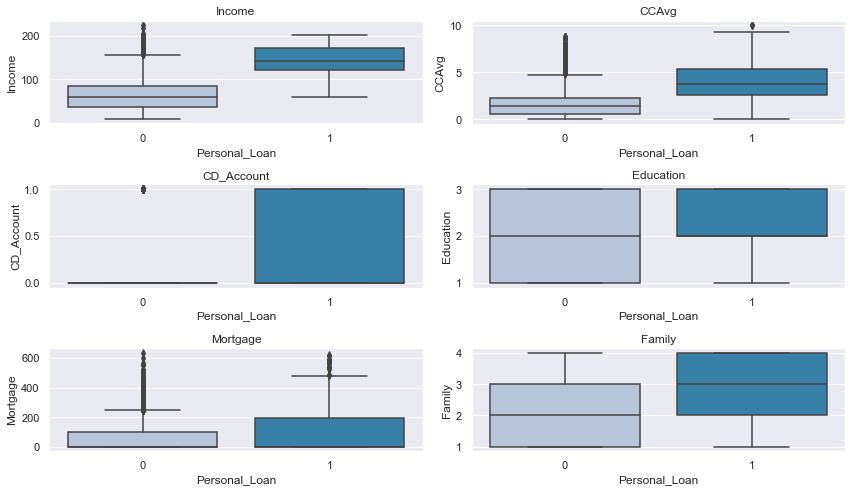

In [78]:
cols = data[
    [
        "Income",
        "CCAvg",
        "CD_Account",
        "Education",
        "Mortgage",
        "Family",
    ]
].columns.tolist()
plt.figure(figsize=(12, 7))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data["Personal_Loan"], data[variable], palette="PuBu")
    plt.tight_layout()
    plt.title(variable)
plt.show()

* Those customers who have more income,high family size ,CCAvg and CD_Account help in generating the personal_loan.
* many of them have outliers.

**It is difficult to make an interpretation from the graphs above let's visualize them by removing these outliers (for visualization not from orignal data) to get a better understanding**

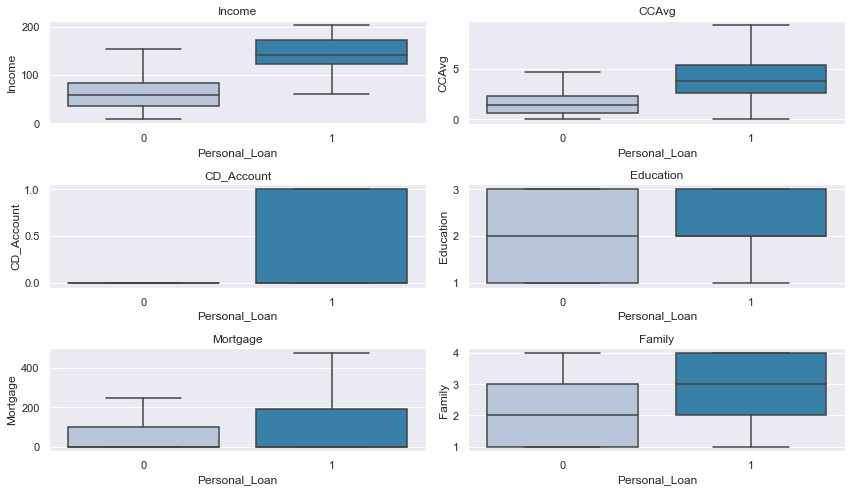

In [79]:
cols = data[
    [
        "Income",
        "CCAvg",
        "CD_Account",
        "Education",
        "Mortgage",
        "Family",
    ]
].columns.tolist()
plt.figure(figsize=(12, 7))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data["Personal_Loan"], data[variable], palette="PuBu", showfliers=False)
    plt.tight_layout()
    plt.title(variable)
plt.show()

* Customers who have high Income , CD_Account ,Family,Education and CCAvg contributed more to get the Personal Loan as compared to the one's who dont.
* But they have many outliers.

### Personal_Loan vs Securities Account, Online

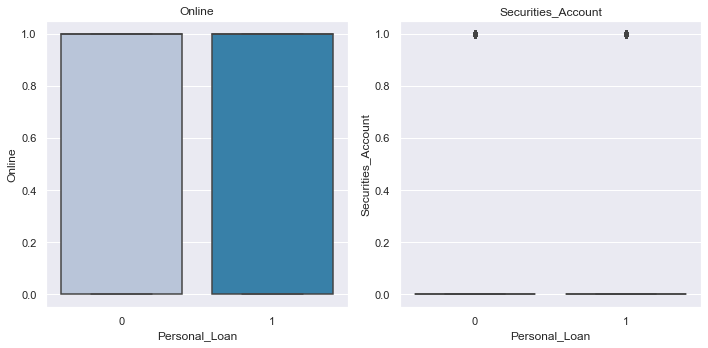

In [80]:
cols = data[['Online','Securities_Account']].columns.tolist()
plt.figure(figsize=(10,5))

for i, variable in enumerate(cols):
                     plt.subplot(1,2,i+1)
                     sns.boxplot(data["Personal_Loan"],data[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()


* Personal loan customers are using online as well as  not using internet banking

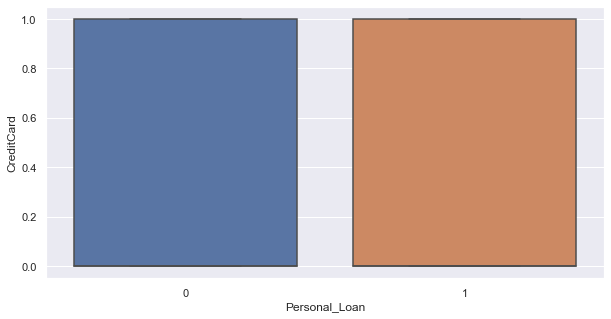

In [81]:
plt.figure(figsize=(10, 5))
sns.boxplot(data["Personal_Loan"], data["CreditCard"])
plt.show()

* Personal loan customers are using credit card as well as not using credit card

In [82]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Personal_Loan     0    1   All
Experience                    
All            4520  480  5000
9               127   20   147
8               101   18   119
20              131   17   148
3               112   17   129
12               86   16   102
32              140   14   154
19              121   14   135
5               132   14   146
25              128   14   142
26              120   14   134
37              103   13   116
11              103   13   116
16              114   13   127
30              113   13   126
22              111   13   124
35              130   13   143
23              131   13   144
36              102   12   114
29              112   12   124
7               109   12   121
6               107   12   119
18              125   12   137
31               92   12   104
28              127   11   138
21              102   11   113
13              106   11   117
17              114   11   125
34              115   10   125
39               75   10    85
27      

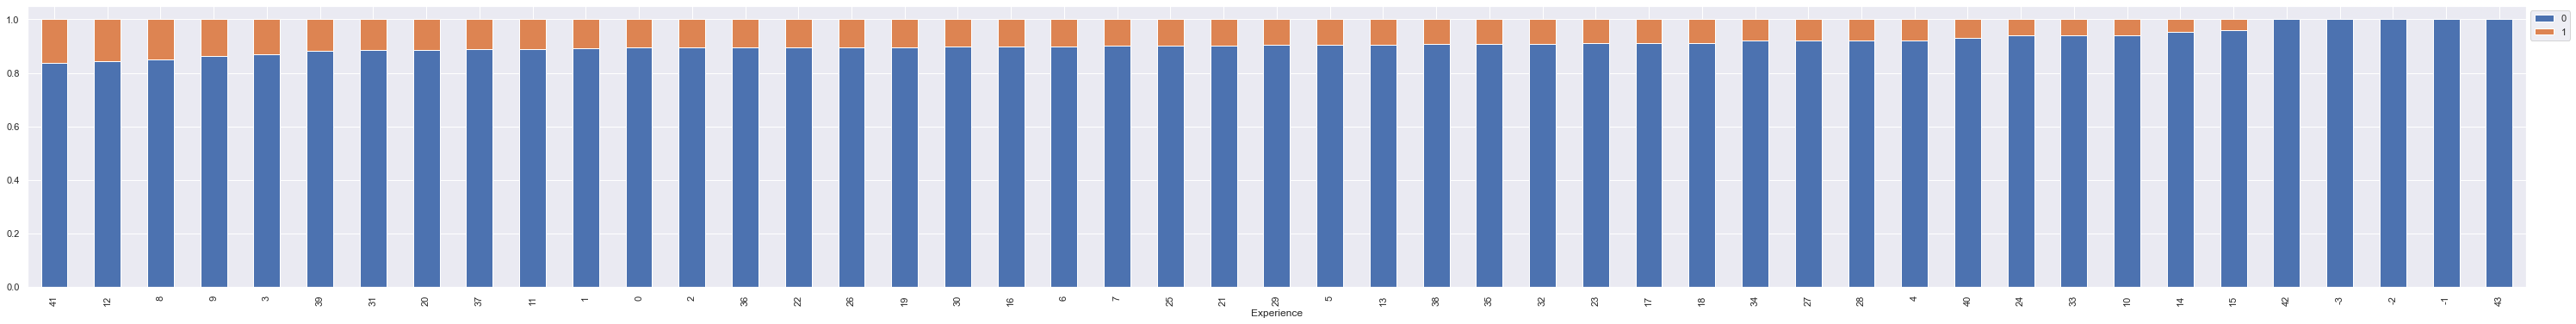

In [83]:
stacked_barplot(data, "Experience", "Personal_Loan")

Experienced customers contribute less to the personal_Loan

Personal_Loan     0    1   All
Age                           
All            4520  480  5000
34              116   18   134
30              119   17   136
36               91   16   107
63               92   16   108
35              135   16   151
33              105   15   120
52              130   15   145
29              108   15   123
54              128   15   143
43              134   15   149
42              112   14   126
56              121   14   135
65               66   14    80
44              107   14   121
50              125   13   138
45              114   13   127
46              114   13   127
26               65   13    78
32              108   12   120
57              120   12   132
38              103   12   115
27               79   12    91
48              106   12   118
61              110   12   122
53              101   11   112
51              119   10   129
60              117   10   127
58              133   10   143
49              105   10   115
47      

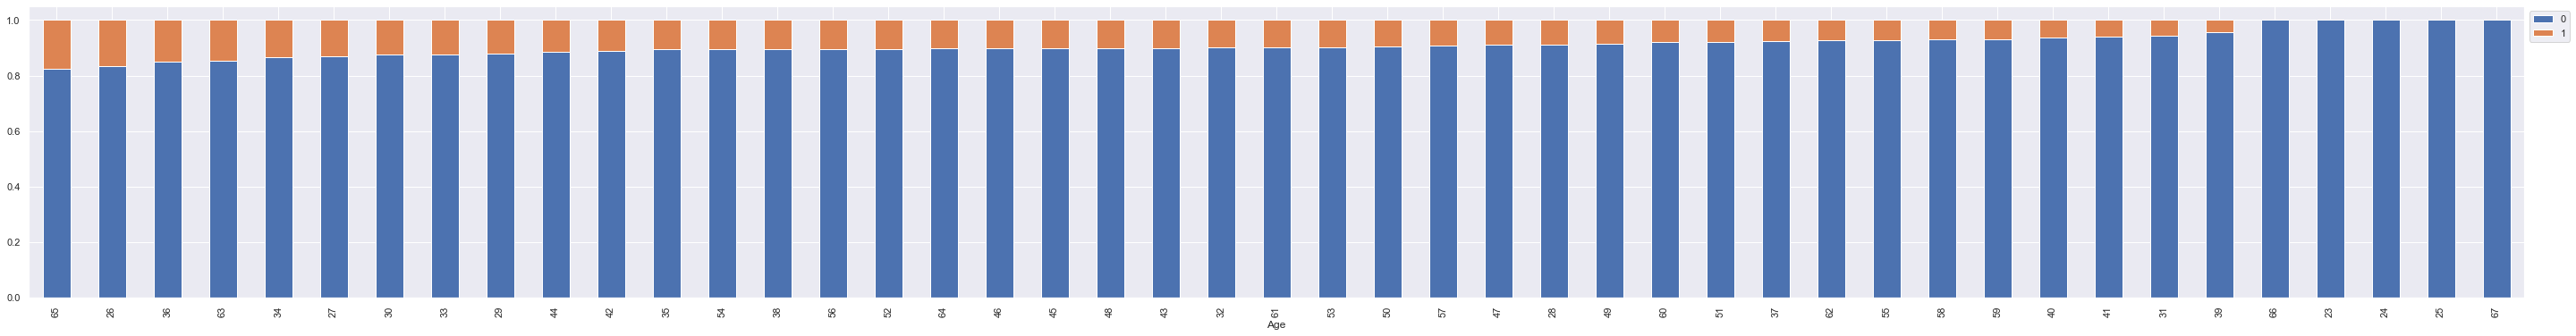

In [85]:
stacked_barplot(data, "Age", "Personal_Loan")

Personal_Loan     0    1   All
ZIPCode                       
All            4520  480  5000
94720           150   19   169
94305           114   13   127
92093            42    9    51
90095            63    8    71
...             ...  ...   ...
92866             8    0     8
92843             3    0     3
92835             3    0     3
92833             4    0     4
90005             5    0     5

[468 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


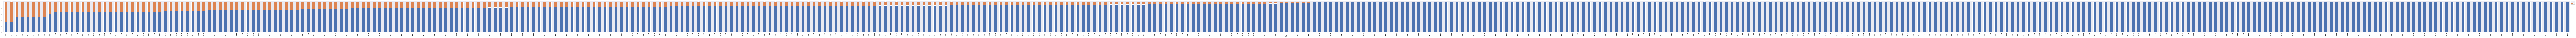

In [87]:
stacked_barplot(data, "ZIPCode", "Personal_Loan")

### <a id='link1'>Summary of EDA</a>
**Data Description:**

- There are no duplicate values in the dataset
- There are no missing values in the data.
- Most of the data-types are either **int64** or **float64**.

**Observations from EDA:**
    
* High income customers contributed more to the personal loan.
* High Family size customers contributed more to the Personal loan.
* High Educated Customers are contributed more to the Personal Loan
* Average spending on credit cards per month in high values are contributed more to the personal loan. 
* Only 9.6% customers have a personal loan.
* 3.4% customers are from zip code 94720

### Model evaluation criterion

### Model can make wrong predictions as:

1. Predicting a customer is not going to default but in reality the customer will default - Loss of resources (FN)
2. Predicting a customer is going to default but in reality the customer will not default - Loss of opportunity (FP)


### Which Loss is greater ? 

* Loss of resources will be the greater loss as the bank will be losing on its resources/money.

### How to reduce this loss i.e need to reduce False Negatives ?

* Company would want to reduce false negatives, this can be done by maximizing the Recall. Greater the recall lesser the chances of false negatives.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn_with_threshold function will be used to check the model performance of models. 
* The confusion_matrix_sklearn_with_threshold function will be used to plot confusion matrix.

In [157]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [158]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Actions for data preparation:

* ID column has information related to the customer ID and would create a bias in model if used in prediction. So, we will drop it.

### Data Preparation

In [88]:
# dropping PageValues
data = data.drop(["ID"], axis=1)

## Split Data


In [90]:
X = data.drop("Personal_Loan", axis=1)  # Features
y = data["Personal_Loan"] # Labels (Target Variable)

In [91]:
X.shape

(5000, 12)

In [92]:
y.shape

(5000,)

In [93]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(3500, 12) (1500, 12)


In [94]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 3500
Number of rows in test data = 1500


In [95]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


### Logistic Regression

In [159]:
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is faster for high-dimensional data

model = LogisticRegression(solver="newton-cg", random_state=1)
lg = model.fit(X_train, y_train)

### Finding the coefficients

In [160]:
log_odds = lg.coef_[0]
pd.DataFrame(log_odds, X_train.columns, columns=["coef"]).T

Age  Experience    Income  ZIPCode    Family     CCAvg  Education  \
coef -0.110074    0.113799  0.051425 -0.00011  0.711868  0.173407   1.662608   

      Mortgage  Securities_Account  CD_Account  Online  CreditCard  
coef  0.000772           -0.683281    3.051123 -0.5233   -0.870875

### Coefficient interpretations

* Coefficients of Duration, Credit amount and some categorical levels of Purpose and Job are positive, an increase in these will lead to an increase in chances of a customer being a defaulter. 
* Coefficients of Age, Sex_male, Housing, Saving_accounts, and some categorical levels of Purpose and Job is negative, an increase in these will lead to a decrease in chances of a customer being a defaulter.

###  Converting coefficients to odds

* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

**Odds from coefficients**

In [161]:
# converting coefficients to odds
odds = np.exp(lg.coef_[0])

# finding the percentage change
perc_change_odds = (np.exp(lg.coef_[0]) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train.columns).T

Age  Experience    Income   ZIPCode      Family      CCAvg  \
Odds          0.895768    1.120527  1.052770  0.999890    2.037795   1.189350   
Change_odd% -10.423185   12.052726  5.276998 -0.011032  103.779462  18.935034   

              Education  Mortgage  Securities_Account   CD_Account     Online  \
Odds           5.273047  1.000773            0.504957    21.139067   0.592562   
Change_odd%  427.304742  0.077258          -49.504255  2013.906658 -40.743801   

             CreditCard  
Odds           0.418585  
Change_odd%  -58.141480

### Coefficient interpretations

* `Age`: Holding all other features constant a unit change in Age will decrease the odds of a customer being a defaulter by 0.89 times or a 10.4% decrease in the odds.
* `Experience`: Holding all other features constant a unit change in Experience will increase the odds of a customer being a defaulter by 1.12 times or a 12.05% increase in the odds.
* `Income`: Holding all other features constant a unit change in Income will increase the odds of a customer being a defaulter by 1.05 times or a 5.27% increase in the odds.

`Interpretation for other attributes can be made similarly.`

#### Checking model performance on training set

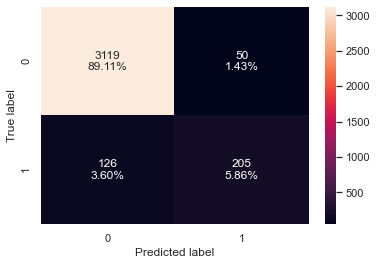

In [162]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_train, y_train)

In [163]:
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0  0.949714  0.619335   0.803922  0.699659

#### ROC-AUC

* ROC-AUC on training set

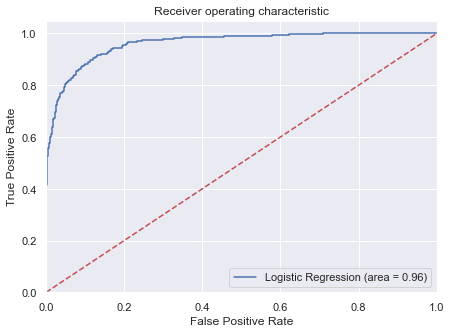

In [164]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict_proba(X_train)[:, 1])
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Logistic Regression model is giving a good performance on training set but the recall is low.

### Model Performance Improvement


* Let's see if the recall score can be improved further, by changing the model threshold using AUC-ROC Curve.

### Optimal threshold using AUC-ROC curve

In [165]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.07796103587920977


#### Checking model performance on training set


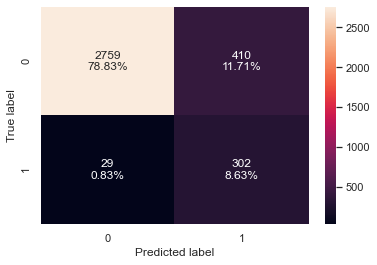

In [166]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)

In [167]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy    Recall  Precision        F1
0  0.874571  0.912387   0.424157  0.579099

* Model performance has improved significantly on training set.
* Model is giving a recall of 0.91 on the training set.

#### Let's use Precision-Recall curve and see if we can find a better threshold

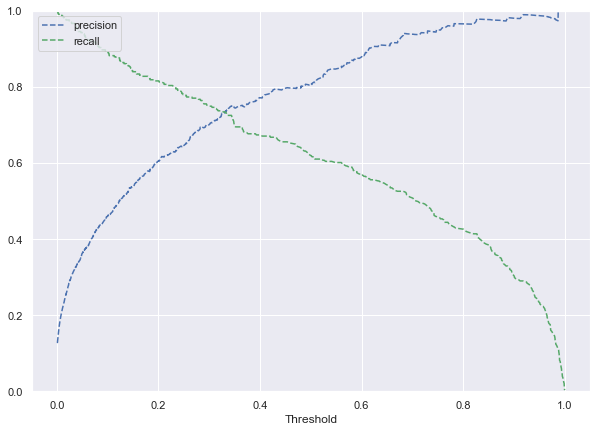

In [168]:
y_scores = lg.predict_proba(X_train)[:, 1]
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At threshold around 0.34 we will get equal precision and recall but taking a step back and selecting value around 0.30 will provide a higher recall and a good precision.

In [185]:
# setting the threshold
optimal_threshold_curve = 0.30

#### Checking model performance on training set

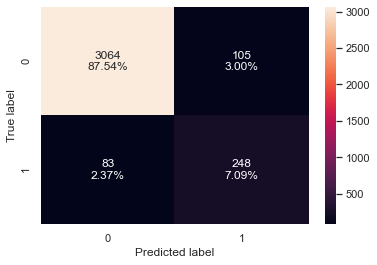

In [186]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)

In [187]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy    Recall  Precision        F1
0  0.946286  0.749245    0.70255  0.725146

### Recall has improved as compared to the initial model.
* Model with threshold as 0.30 was giving a better recall.

### Model Performance Summary

In [198]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.30 Threshold",
    "Logistic Regression-0.34 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression sklearn  Logistic Regression-0.30 Threshold  \
Accuracy                      0.949714                            0.874571   
Recall                        0.619335                            0.912387   
Precision                     0.803922                            0.424157   
F1                            0.699659                            0.579099   

           Logistic Regression-0.34 Threshold  
Accuracy                             0.946286  
Recall                               0.749245  
Precision                            0.702550  
F1                                   0.725146

### Let's check the performance on the test set


**Using the model with default threshold**

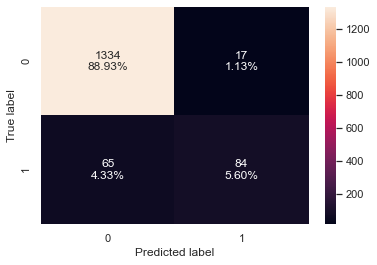

In [173]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_test, y_test)

In [174]:
log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test
)

print("Test set performance:")
log_reg_model_test_perf

Test set performance:


Accuracy    Recall  Precision     F1
0  0.945333  0.563758   0.831683  0.672

* ROC-AUC on test set

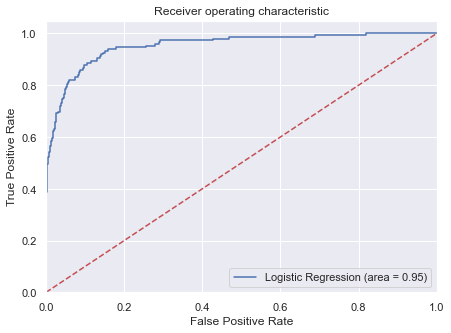

In [175]:
logit_roc_auc_test = roc_auc_score(y_test, lg.predict_proba(X_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(X_test)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**Using the model with threshold of 0.30**

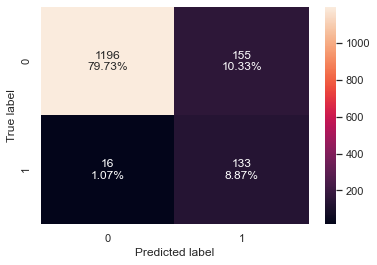

In [176]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)

In [177]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)
print("Test set performance:")
log_reg_model_test_perf_threshold_auc_roc

Test set performance:


Accuracy    Recall  Precision        F1
0     0.886  0.892617   0.461806  0.608696

**Using the model with threshold 0.34**

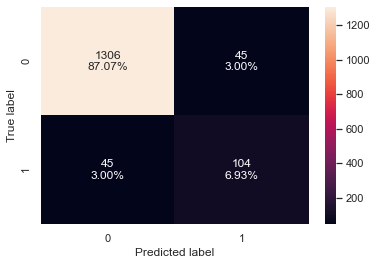

In [178]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)

In [179]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


Accuracy    Recall  Precision        F1
0      0.94  0.697987   0.697987  0.697987

### Model performance comparison

In [199]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.30 Threshold",
    "Logistic Regression-0.34 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression sklearn  Logistic Regression-0.30 Threshold  \
Accuracy                      0.949714                            0.874571   
Recall                        0.619335                            0.912387   
Precision                     0.803922                            0.424157   
F1                            0.699659                            0.579099   

           Logistic Regression-0.34 Threshold  
Accuracy                             0.946286  
Recall                               0.749245  
Precision                            0.702550  
F1                                   0.725146

In [200]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.30 Threshold",
    "Logistic Regression-0.34 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Logistic Regression sklearn  Logistic Regression-0.30 Threshold  \
Accuracy                      0.945333                            0.886000   
Recall                        0.563758                            0.892617   
Precision                     0.831683                            0.461806   
F1                            0.672000                            0.608696   

           Logistic Regression-0.34 Threshold  
Accuracy                             0.940000  
Recall                               0.697987  
Precision                            0.697987  
F1                                   0.697987

### Conclusion

* By changing the threshold of the logistic regression model we were able to see a significant improvement in the model performance.
* The model achieved a recall of 0.91 on the training set with threshold set at 0.30.

## Recommendations

- From our logistic regression model we identified that 
*Experience`: Holding all other features constant a unit change in Experience will increase the odds of a customer being a defaulter by 1.12 times or a 12.05% increase in the odds.
* Income`: Holding all other features constant a unit change in Income will increase the odds of a customer being a defaulter by 1.05 times or a 5.27% increase in the odds.
* Family :Holding all other features constant a unit change in Income will increase the odds of a customer being a defaulter by 2 times or a 103 % increase in the odds.
* CCAvg : Holding all other features constant a unit change in Income will increase the odds of a customer being a defaulter by 1.18 times or a 18.93 % increase in the odds.
* Education :Holding all other features constant a unit change in Income will increase the odds of a customer being a defaulter by 5.2 times or a 427% increase in the odds.
* CD_Account :Holding all other features constant a unit change in Income will increase the odds of a customer being a defaulter by 21 times or a 2013% increase in the odds.


### Decision Tree

In [96]:
##  Function to calculate recall score
def get_recall_score(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable

    """
    prediction = model.predict(predictors)
    return recall_score(target, prediction)

In [97]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [98]:
model = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.15, 1: 0.85}, random_state=1
)

In [100]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

#### Checking model performance on training set

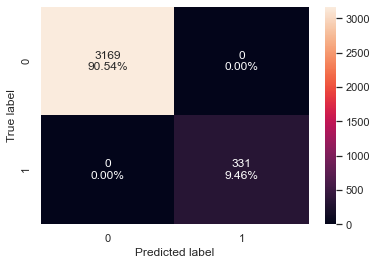

In [101]:
confusion_matrix_sklearn(model, X_train, y_train)

In [102]:
decision_tree_perf_train = get_recall_score(model, X_train, y_train)

print("Recall Score:", decision_tree_perf_train)

Recall Score: 1.0


In [103]:
model.predict_proba(X_train.loc[[0]])

array([[1., 0.]])

In [104]:
model.predict_proba(X_test.iloc[[0]])

array([[1., 0.]])

* Model is able to perfectly classify all the data points on the training set.
* 0 errors on the training set, each sample has been classified correctly.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.

#### Checking model performance on test set

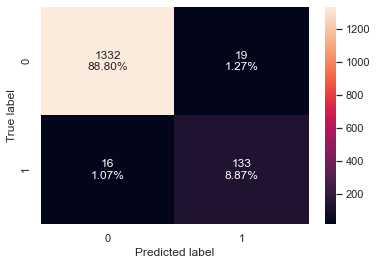

In [105]:
confusion_matrix_sklearn(model, X_test, y_test)

In [106]:
decision_tree_perf_test = get_recall_score(model, X_test, y_test)
print("Recall Score:", decision_tree_perf_test)

Recall Score: 0.8926174496644296


## Visualizing the Decision Tree


In [108]:
feature_names = X_train.columns.to_list()

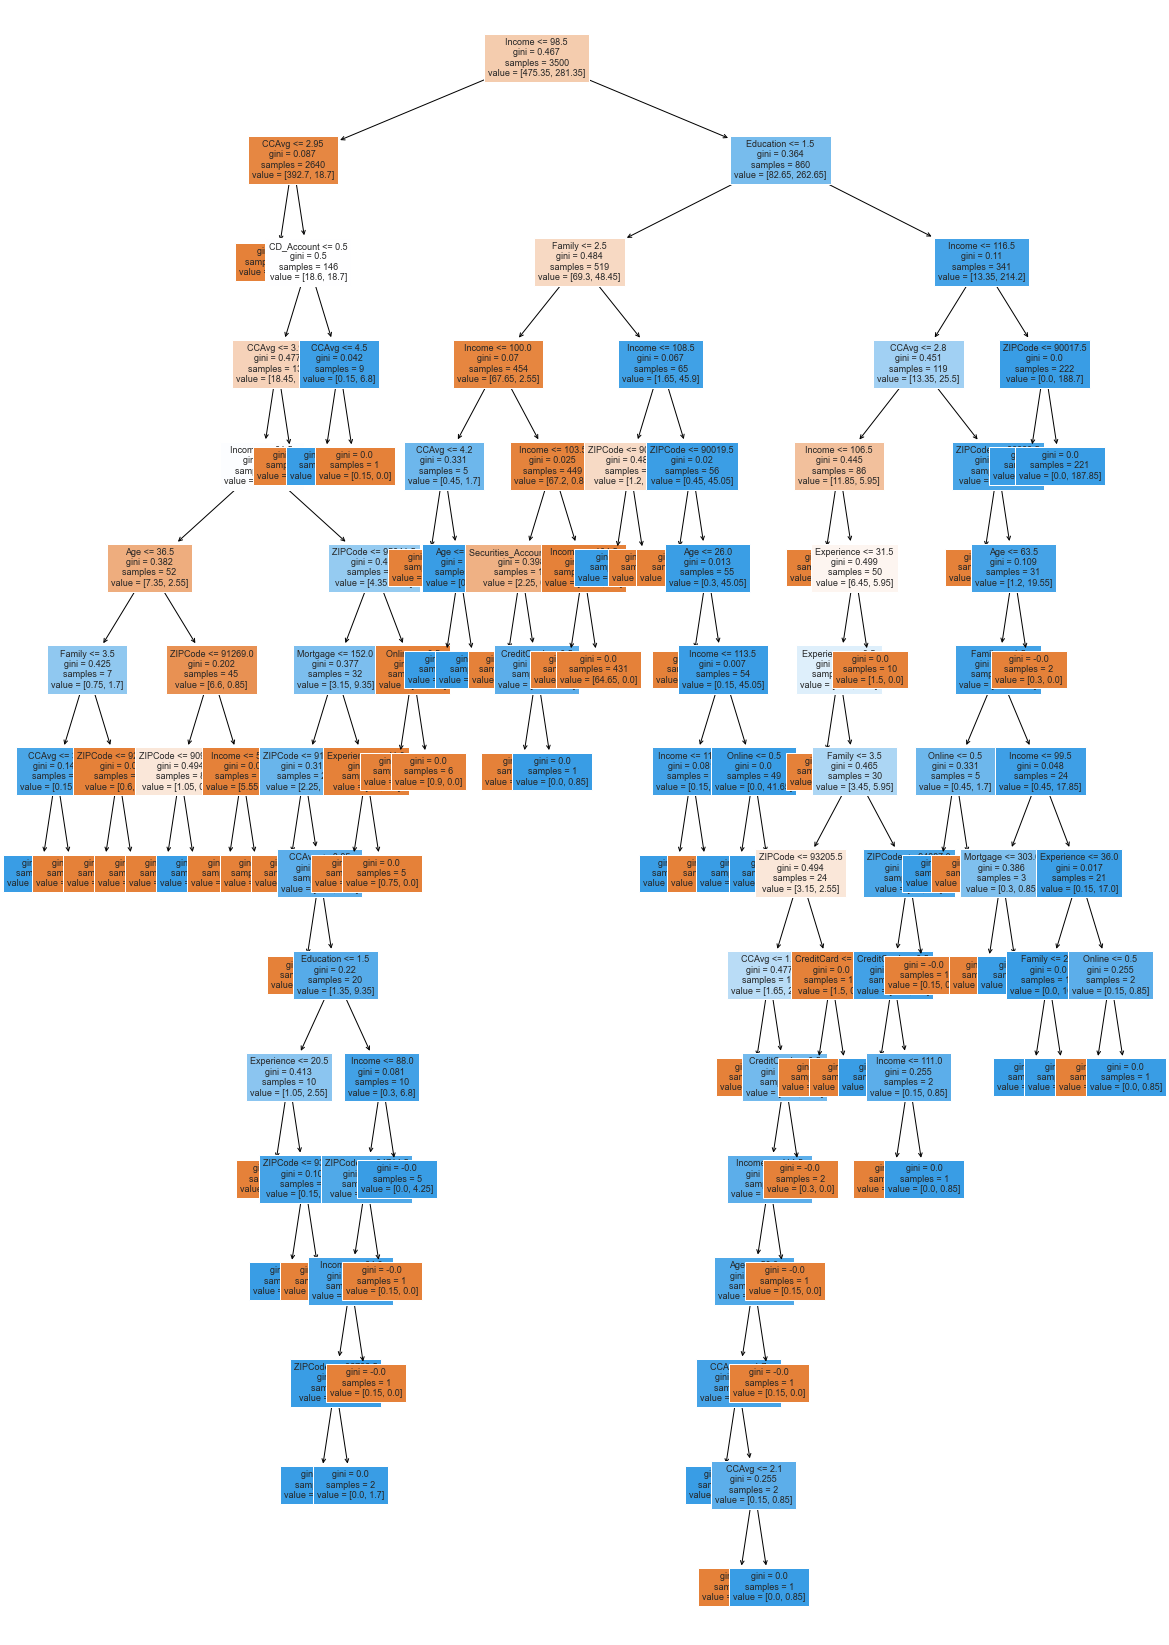

In [109]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [110]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |   |--- CCAvg <= 3.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.70] class: 1
|   |   |   |   |   |   |   |--- CCAvg >  3.50
|   |   |   |   |   |   |   |   |--- weights: [0.15, 0.00] class: 0
|   |   |   |   |   |   |--- Family >  3.50
|   |   |   |   |   |   |   |--- ZIPCode <= 92308.50
|   |   |   |   |   |   |   |   |--- weights: [0.15, 0.00] class: 0
|   |   |   |   |   |   |   |--- ZIPCode >  92308.50
|   |   |   |   |   |   |   |   |--- weights: [0.45, 0.00] class: 0
|   |   |   |   |   |--- Age >  36.50
|   |   |   |   |   |   |--- ZIPCode <= 91269.00
|   |   |   |   |   |   |   |--- ZIPCode <= 90974.00
|   |   |   |   |   |   |   |   |--- weights: [1.

In [111]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.591182
Family              0.143778
Education           0.124105
CCAvg               0.083145
ZIPCode             0.019759
CD_Account          0.011000
Experience          0.008682
Age                 0.006593
Mortgage            0.004325
Securities_Account  0.002769
Online              0.002735
CreditCard          0.001928


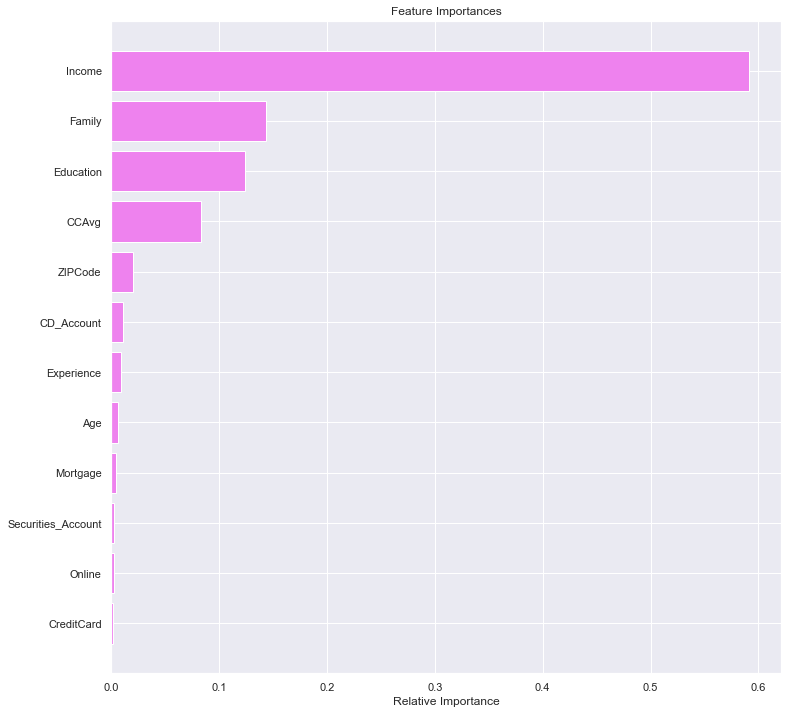

In [112]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* According to the decision tree model, Income is the most important variable for predicting the Revenue.

### Reducing over fitting

In [113]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 10, 15, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, max_depth=5,
                       min_impurity_decrease=1e-05, random_state=1)

In [114]:
grid_obj.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_impurity_decrease': 1e-05,
 'splitter': 'best'}

In [115]:
pd.DataFrame(grid_obj.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.009051      0.004117         0.002925        0.003062   
1        0.007517      0.004540         0.004312        0.002881   
2        0.008480      0.004377         0.004829        0.003505   
3        0.012547      0.003784         0.001620        0.003240   
4        0.013058      0.006554         0.006708        0.007813   
5        0.003155      0.006311         0.009934        0.008125   
6        0.012501      0.006251         0.006243        0.007646   
7        0.012501      0.006251         0.003125        0.006250   
8        0.011543      0.010222         0.008522        0.008087   
9        0.003563      0.006161         0.006371        0.007803   
10       0.012771      0.006402         0.006250        0.007654   
11       0.015904      0.000493         0.000000        0.000000   
12       0.013527      0.007034         0.006498        0.007968   
13       0.014278      0.001631         0.000407        0.000499   
14       0.017037      0.002757         0.004637        0.002365   
15       0.009284      0.002203         0.004552        0.000719   
16       0.012548      0.001756         0.006268        0.001339   
17       0.008951      0.000868         0.004443        0.002190   
18       0.014531      0.001908         0.004317        0.002042   
19       0.010394      0.004562         0.005601        0.001421   
20       0.012381      0.003270         0.006672        0.003243   
21       0.001632      0.003264         0.015572        0.003813   
22       0.004397      0.006194         0.012558        0.006364   
23       0.008257      0.006836         0.009016        0.005609   
24       0.013866      0.001398         0.004919        0.002660   
25       0.008038      0.001305         0.008592        0.000952   
26       0.013369      0.002486         0.005943        0.003486   
27       0.007988      0.006089         0.001052        0.002105   
28       0.012562      0.006282         0.006488        0.007955   
29       0.003132      0.006264         0.013754        0.006958   
30       0.011824      0.008323         0.009131        0.008546   
31       0.011426      0.002778         0.004886        0.004101   
32       0.011134      0.001222         0.006459        0.002102   
33       0.007899      0.002490         0.008888        0.003173   
34       0.010282      0.006349         0.008946        0.005255   
35       0.003125      0.006250         0.013884        0.006674   
36       0.012204      0.002052         0.005436        0.001319   
37       0.009970      0.002262         0.006268        0.003475   
38       0.010473      0.003368         0.007224        0.003103   
39       0.010019      0.005795         0.003380        0.004143   
40       0.003968      0.005942         0.013413        0.006811   
41       0.009375      0.007654         0.000000        0.000000   
42       0.008248      0.004674         0.007424        0.005862   
43       0.009702      0.001814         0.006387        0.001929   
44       0.009792      0.001683         0.004456        0.001149   
45       0.011272      0.004123         0.004044        0.003434   
46       0.014461      0.002938         0.004315        0.004826   
47       0.014104      0.003731         0.000000        0.000000   

   param_criterion param_max_depth param_min_impurity_decrease param_splitter  \
0          entropy               5                     0.00001           best   
1          entropy               5                     0.00001         random   
2          entropy               5                      0.0001           best   
3          entropy               5                      0.0001         random   
4          entropy               5                        0.01           best   
5          entropy               5                        0.01         random   
6          entropy              10                     0.00001           best   
7          entropy     

#### Checking performance on training set

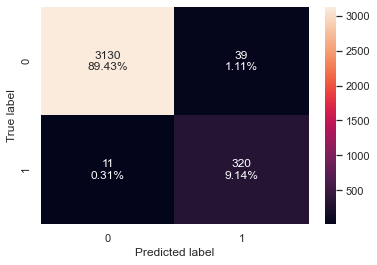

In [116]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [117]:
estimator.predict_proba(X_test.iloc[[0]])[0, 1]

0.0

In [118]:
decision_tree_tune_perf_train = get_recall_score(estimator, X_train, y_train)
print("Recall Score:", decision_tree_tune_perf_train)

Recall Score: 0.9667673716012085


#### Checking performance on test set

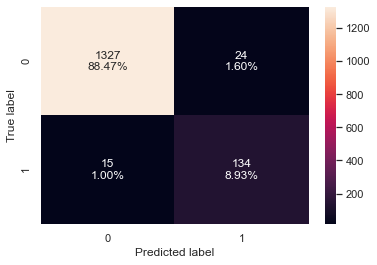

In [120]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [121]:
decision_tree_tune_perf_test = get_recall_score(estimator, X_test, y_test)
print("Recall Score:", decision_tree_tune_perf_test)

Recall Score: 0.8993288590604027


* The model is giving a generalized result now.

## Visualizing the Decision Tree

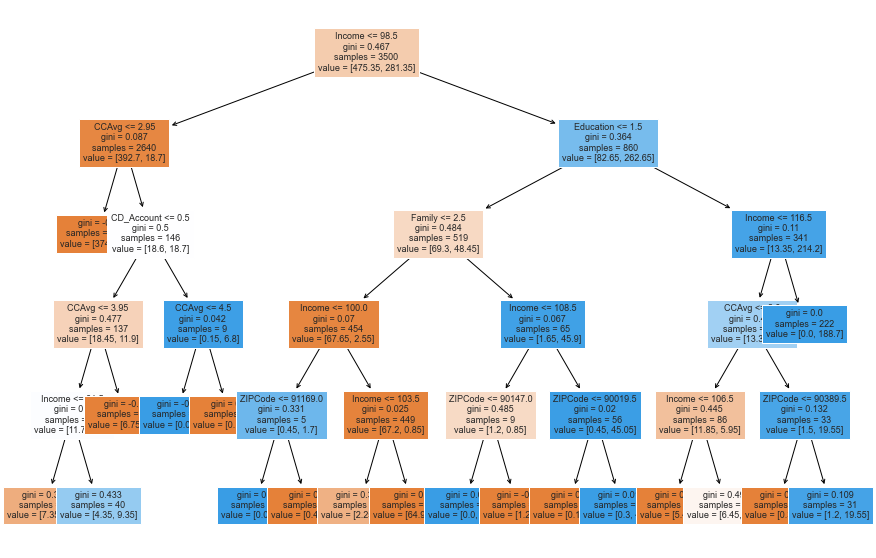

In [122]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [123]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |--- weights: [7.35, 2.55] class: 0
|   |   |   |   |--- Income >  81.50
|   |   |   |   |   |--- weights: [4.35, 9.35] class: 1
|   |   |   |--- CCAvg >  3.95
|   |   |   |   |--- weights: [6.75, 0.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- CCAvg <= 4.50
|   |   |   |   |--- weights: [0.00, 6.80] class: 1
|   |   |   |--- CCAvg >  4.50
|   |   |   |   |--- weights: [0.15, 0.00] class: 0
|--- Income >  98.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- Income <= 100.00
|   |   |   |   |--- ZIPCode <= 91169.00
|   |   |   |   |   |--- weights: [0.00, 1.70] class: 1
|   |   |   |   |--- ZIPCode >  91169.00
|   |   |   |   |   |--- weights: [0.45, 0.00] class: 0
|   |   |   |--- Income >  100.00
|   |   |   |   |--

**Observations from the tree:**

Using the above extracted decision rules we can make interpretations from the decision tree model like:

* If a customer's income' is less than 98.5 and CCAVG is greater than 2.95 and CD account is less than 0.5  and ccavg is less than 3.95 and income greater than 81.50 then the customer will contribute on personal loans.


`Interpretations from other decision rules can be made similarly`

In [124]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

# Here we will see that importance of features has increased

                         Imp
Income              0.622927
Family              0.146723
Education           0.130659
CCAvg               0.080454
CD_Account          0.011659
ZIPCode             0.007577
Age                 0.000000
Experience          0.000000
Mortgage            0.000000
Securities_Account  0.000000
Online              0.000000
CreditCard          0.000000


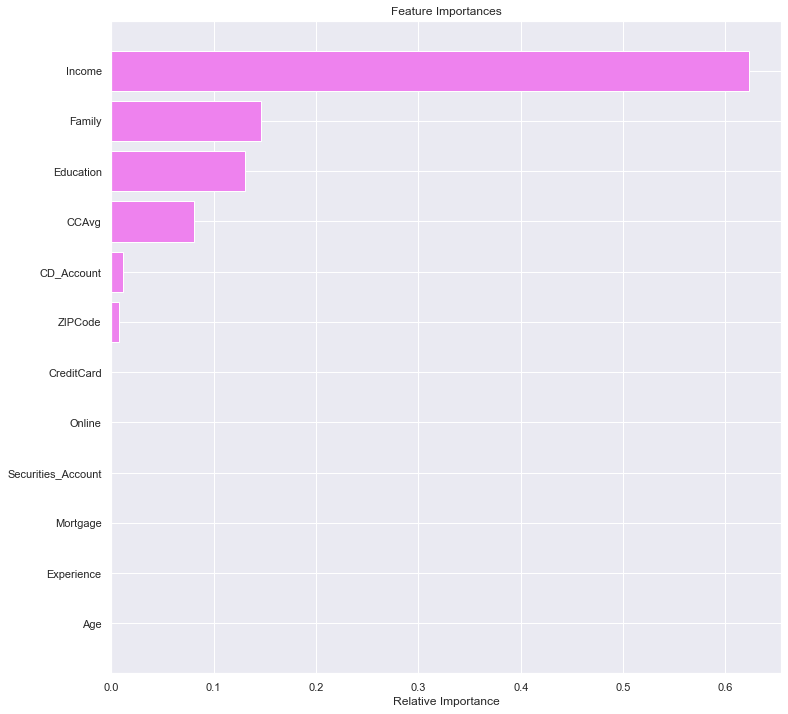

In [125]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* In tuned decision tree Income is the most important feature followed by Family.

Total impurity of leaves vs effective alphas of pruned tree


In [127]:
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [128]:
pd.DataFrame(path)

ccp_alphas    impurities
0   0.000000e+00 -7.946208e-15
1   7.482671e-19 -7.945460e-15
2   7.482671e-19 -7.944712e-15
3   8.803143e-19 -7.943831e-15
4   4.071454e-18 -7.939760e-15
5   6.998499e-18 -7.932761e-15
6   7.042514e-18 -7.925719e-15
7   9.478050e-18 -7.916241e-15
8   1.166416e-17 -7.904577e-15
9   1.222170e-17 -7.892355e-15
10  1.143528e-16 -7.778002e-15
11  8.028906e-16 -6.975112e-15
12  1.872164e-04  3.744328e-04
13  1.898533e-04  7.541394e-04
14  1.964954e-04  1.147130e-03
15  1.975713e-04  1.542273e-03
16  2.531377e-04  2.301686e-03
17  3.182679e-04  2.938222e-03
18  3.369896e-04  3.275211e-03
19  3.489195e-04  3.624131e-03
20  3.643130e-04  3.988444e-03
21  3.744328e-04  4.362877e-03
22  3.835686e-04  5.130014e-03
23  3.879017e-04  5.517916e-03
24  3.912346e-04  6.300385e-03
25  5.208020e-04  6.821187e-03
26  5.569668e-04  7.935120e-03
27  7.040048e-04  9.343130e-03
28  8.576797e-04  1.191617e-02
29  9.404360e-04  1.285661e-02
30  9.407728e-04  1.473815e-02
31  9.951370e-04  1.672842e-02
32  1.011155e-03  1.773958e-02
33  1.086501e-03  1.882608e-02
34  1.096425e-03  2.101893e-02
35  1.242301e-03  2.474583e-02
36  1.315081e-03  2.606091e-02
37  1.434181e-03  2.749510e-02
38  1.619124e-03  2.911422e-02
39  1.638043e-03  3.075226e-02
40  1.717019e-03  3.246928e-02
41  2.289245e-03  3.475853e-02
42  2.742431e-03  3.750096e-02
43  3.335999e-03  4.083696e-02
44  3.527226e-03  4.436418e-02
45  5.138280e-03  4.950246e-02
46  9.008434e-03  5.851090e-02
47  1.005479e-02  6.856568e-02
48  2.253222e-02  9.109791e-02
49  6.112098e-02  2.133399e-01
50  2.537957e-01  4.671356e-01

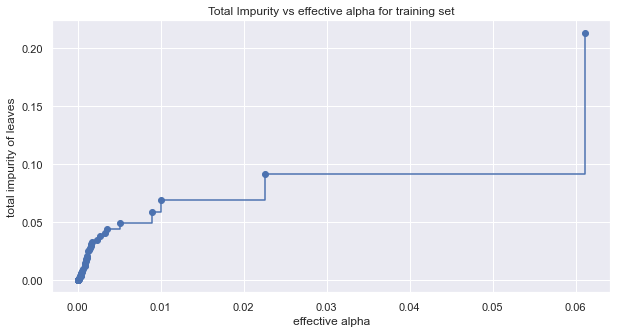

In [129]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [130]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.15, 1: 0.85}
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2537957148948088


For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

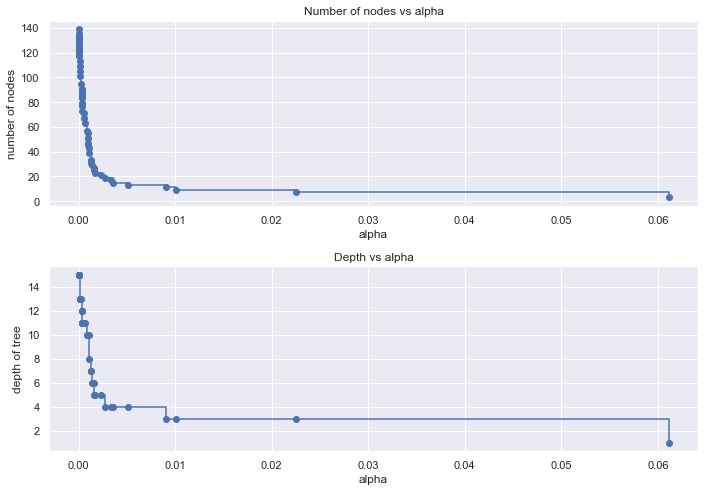

In [131]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [132]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [133]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [134]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

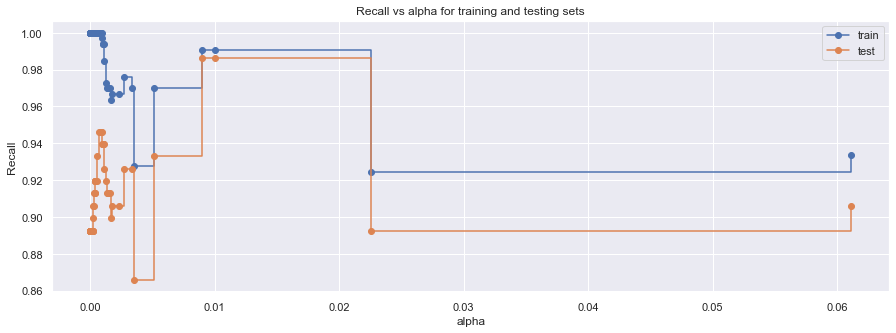

In [135]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas,
    recall_train,
    marker="o",
    label="train",
    drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

**Maximum value of Recall is at 0.02 alpha, but if we choose decision tree will only have a root node and we would lose the buisness rules, instead we can choose alpha 0.01 retaining information and getting higher recall.**

In [136]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00900843430150809,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)


In [137]:
ccp_alphas[index_best_model]

0.00900843430150809

In [138]:
recall_test[index_best_model]

0.9865771812080537

In [139]:
recall_test

[0.8926174496644296,
 0.8926174496644296,
 0.8926174496644296,
 0.8926174496644296,
 0.8926174496644296,
 0.8926174496644296,
 0.8926174496644296,
 0.8926174496644296,
 0.8926174496644296,
 0.8926174496644296,
 0.8926174496644296,
 0.8926174496644296,
 0.8926174496644296,
 0.8926174496644296,
 0.8926174496644296,
 0.8993288590604027,
 0.9060402684563759,
 0.9060402684563759,
 0.912751677852349,
 0.912751677852349,
 0.912751677852349,
 0.9194630872483222,
 0.9194630872483222,
 0.9194630872483222,
 0.9194630872483222,
 0.9194630872483222,
 0.9328859060402684,
 0.9463087248322147,
 0.9463087248322147,
 0.9463087248322147,
 0.9395973154362416,
 0.9395973154362416,
 0.9395973154362416,
 0.9395973154362416,
 0.9261744966442953,
 0.9194630872483222,
 0.912751677852349,
 0.912751677852349,
 0.912751677852349,
 0.8993288590604027,
 0.9060402684563759,
 0.9060402684563759,
 0.9261744966442953,
 0.9261744966442953,
 0.8657718120805369,
 0.9328859060402684,
 0.9865771812080537,
 0.9865771812080537

In [140]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.00900843430150809,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

#### checking performance on training set

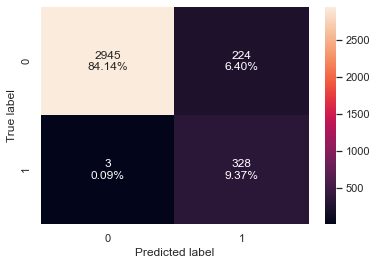

In [141]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [142]:
print("Recall Score:", get_recall_score(best_model, X_train, y_train))

Recall Score: 0.9909365558912386


#### checking performance on test set

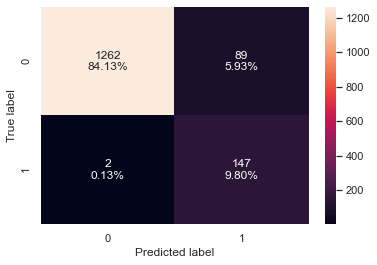

In [143]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [144]:
print("Recall Score:", get_recall_score(best_model, X_test, y_test))

Recall Score: 0.9865771812080537


### Visualizing the Decision Tree


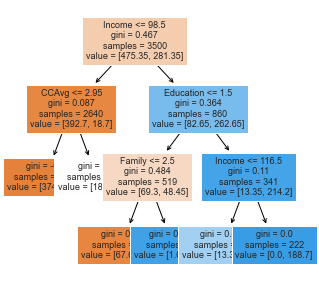

In [145]:
plt.figure(figsize=(5, 5))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

* This model might be giving the highest recall but a buisness would not be able to use it to actually target the potential customers.

**Creating model with 0.01 ccp_alpha**

best_model2 = DecisionTreeClassifier(
    ccp_alpha=0.01, class_weight={0: 0.15, 1: 0.85}, random_state=1
)
best_model2.fit(X_train, y_train)

#### Checking performance on the training set


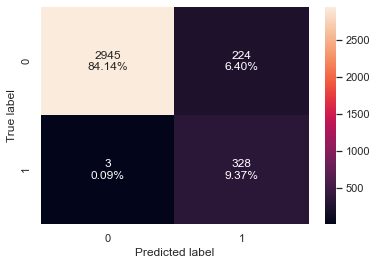

In [147]:
confusion_matrix_sklearn(best_model2, X_train, y_train)

In [148]:
decision_tree_postpruned_perf_train = get_recall_score(best_model2, X_train, y_train)
print("Recall Score:", decision_tree_postpruned_perf_train)

Recall Score: 0.9909365558912386


#### Checking performance on the test set

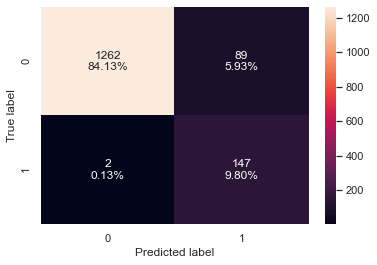

In [149]:
confusion_matrix_sklearn(best_model2, X_test, y_test)

In [150]:
decision_tree_postpruned_perf_test = get_recall_score(best_model2, X_test, y_test)
print("Recall Score:", decision_tree_postpruned_perf_test)

Recall Score: 0.9865771812080537


* The results have improved from the initial model. 
* The performance is comparable to the  hyperparameter tuned model.
* The model is giving a generalized performance on training and test set.

### Visualizing the Decision Tree

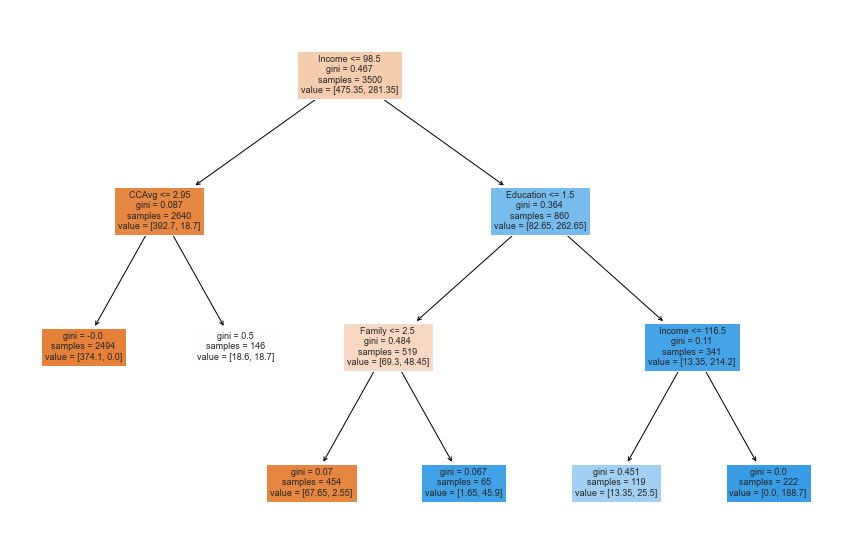

In [151]:
plt.figure(figsize=(15, 10))

out = tree.plot_tree(
    best_model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [152]:
print(tree.export_text(best_model2, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [18.60, 18.70] class: 1
|--- Income >  98.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [67.65, 2.55] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [1.65, 45.90] class: 1
|   |--- Education >  1.50
|   |   |--- Income <= 116.50
|   |   |   |--- weights: [13.35, 25.50] class: 1
|   |   |--- Income >  116.50
|   |   |   |--- weights: [0.00, 188.70] class: 1



In [153]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.645704
Family              0.158240
Education           0.140915
CCAvg               0.055142
Age                 0.000000
Experience          0.000000
ZIPCode             0.000000
Mortgage            0.000000
Securities_Account  0.000000
CD_Account          0.000000
Online              0.000000
CreditCard          0.000000


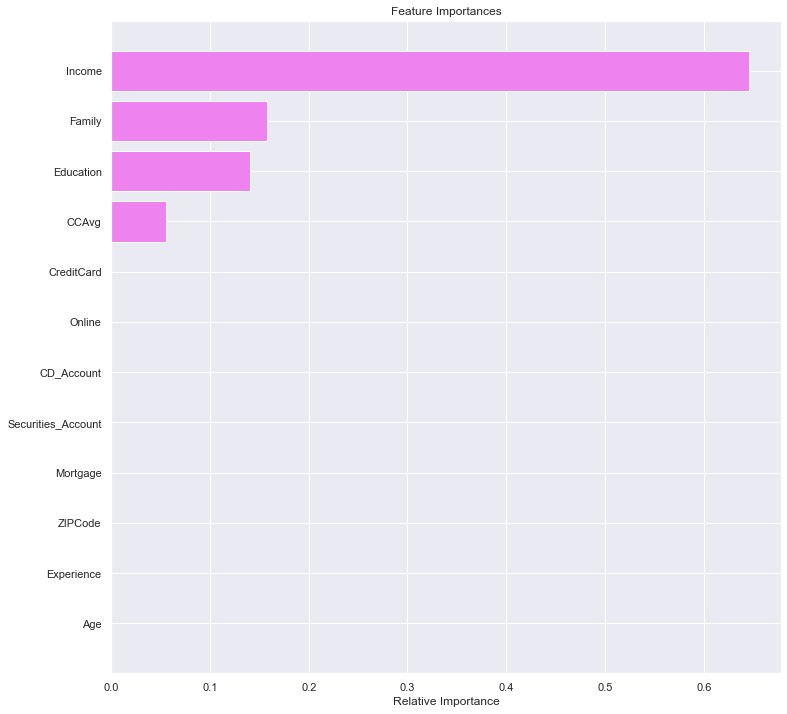

In [154]:
importances = best_model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Income,Family and Education are the top  important features to predict customers who can take Personal Loan.

### Comparing all the decision tree models

In [155]:
# training performance comparison

models_train_comp_df = pd.DataFrame(
    [
        decision_tree_perf_train,
        decision_tree_tune_perf_train,
        decision_tree_postpruned_perf_train,
    ],
    columns=["Recall on training set"],
)

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Recall on training set
0                1.000000
1                0.966767
2                0.990937

In [156]:
# testing performance comparison

models_test_comp_df = pd.DataFrame(
    [
        decision_tree_perf_test,
        decision_tree_tune_perf_test,
        decision_tree_postpruned_perf_test,
    ],
    columns=["Recall on testing set"],
)

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


Recall on testing set
0               0.892617
1               0.899329
2               0.986577

* Decision tree model with pre-pruning has given the best recall score on training data.
* The pre-pruned and the post-pruned models have reduced overfitting and the model is giving a generalized performance.

### Conclusions


- We analyzed the "Personal Loan Campaign " using different techniques and used Decision Tree Classifier to build a predictive model for the same.
- The model built can be used to predict if a customer is going to contribute to Loan generation (by purchasing) or not.
- We visualized different trees and their confusion matrix to get a better understanding of the model. Easy interpretation is one of the key benefits of Decision Trees.
- We verified the fact that how much less data preparation is needed for Decision Trees and such a simple model gave good results even with outliers and imbalanced classes which shows the robustness of Decision Trees.
- Income, Family, Education and CCAvg are the most important variable in predicting the customers that will contribute to the Loan. 
- We established the importance of hyper-parameters/ pruning to reduce overfitting.

### Recommendations

* According to the decision tree model - 

    a) If a customer lands on a page with an income less than 98.5 and ccavg >2.95there's a very high chance the customer will not be contributing to the Loan.

    b) If a customer lands on a page with an income less than 98.5 and CCAvg <2.95  then there is a very high chance that the customer is not going to contribute to the Loan.

** Income,Family , Education and CCAvg are the top  important features to predict customers who can take Personal Loan.